In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from functools import reduce
import seaborn as sns

%run Thesis_Model_Function.ipynb

Run Complete: 14/07/2024 10:22:33


In [189]:
%run Thesis_SWE_Data_Prep.ipynb

Run Complete: 14/07/2024 10:22:35
Run Complete: 14/07/2024 10:22:37


## VARMAX Model Selection 

In [359]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model 3 common, 3 regional, 2 AR, 6 MA
#  - With Exogenous variables pre-COVID period - Best Model 3 common, 4 regional, 2 AR, 5 MA
#  - No Exogenous variables COVID period - Best Model 3 common, 2 regional, 2 AR, 4 MA
#  - With Exogenous variables COVID period - Best Model 2 common, 2 regional, 2 AR, 5 MA
import numpy as np
import random

train_size = 84
regional_logmort_train = stock_logmort_full.iloc[:, :train_size]
country_logmort_train = all_swe_logmort.iloc[:, :train_size]
num_iters = 150
common_limit = 4
regional_limit = 4
ar_limit = 6
ma_limit = 6

track_params = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), 0)
error_store = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), np.inf)

for i in range(num_iters):
    # Initialize random parameters
    common_terms = random.randint(1, common_limit)
    regional_terms = random.randint(1, regional_limit)
    ar = random.randint(1, ar_limit)
    ma = random.randint(1, ma_limit)
    
    # Generate new parameters if already used
    while track_params[common_terms, regional_terms, ar, ma] == 1:
        common_terms = random.randint(1, common_limit)
        regional_terms = random.randint(1, regional_limit)
        ar = random.randint(1, ar_limit)
        ma = random.randint(1, ma_limit)
    
    try:
        # Train the model
        track_params[common_terms, regional_terms, ar, ma] = 1
        _, _, _, _, _, _, _, _, _, _, model, _, test_errors,_,_ = VARMAX_model(
            country_logmort_train, regional_logmort_train, 
            common_terms=common_terms, regional_terms=regional_terms, 
            prediction_period=24, train_period=60, AR=ar+1, MA=ma+1,
            
            #exogenous_train=exog_train_stock, exogenous_test=exog_test_stock,
            country_deaths=swe_death, country_pop=swe_pop, 
            region_deaths=stock_death, region_pop=stock_pop,
            
#             exogenous_train=exog_train_stock_select, exogenous_test=exog_test_stock_select,
#             country_deaths=swe_death_select, country_pop=swe_pop_select, 
#             region_deaths=stock_death_select, region_pop=stock_pop_select,
            re_est=False,smooth = True)
        print(test_errors)
        # Store the mean of test_errors in the appropriate location
        error_store[common_terms, regional_terms, ar, ma] = np.mean(test_errors) 
    except Exception as e:
        print(f"Error in configuration: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}. Error: {str(e)}")
        error_store[common_terms, regional_terms, ar, ma] = np.inf  # Set a large error value
                
    print(f"Configuration {i+1} processed: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}, Error={error_store[common_terms, regional_terms, ar, ma]}")

    
    
    
print(np.where(error_store == np.min(error_store)))

[2.78184333 0.71935372 0.87389082 2.03084846 2.76869539]
Configuration 1 processed: AR=6, MA=5, Common Terms=1, Regional Terms=3, Error=1.8349263430225207
[2.52927999 1.19949716 1.10714337 2.34179689 3.20086974]
Configuration 2 processed: AR=7, MA=3, Common Terms=3, Regional Terms=3, Error=2.075717430333781
[3.2584088  0.53625618 1.56803984 1.16384054 4.0939754 ]
Configuration 3 processed: AR=4, MA=4, Common Terms=3, Regional Terms=4, Error=2.1241041523018107
[2.14075451 0.75632389 0.62960304 1.09896504 3.95823239]
Configuration 4 processed: AR=2, MA=3, Common Terms=3, Regional Terms=4, Error=1.7167757749144186
[1.876444   1.08209562 0.69569345 1.8242294  3.74423916]
Configuration 5 processed: AR=2, MA=2, Common Terms=3, Regional Terms=2, Error=1.8445403238738518
[2.19949976 0.65293866 0.95750544 1.48945261 1.5409397 ]
Configuration 6 processed: AR=7, MA=5, Common Terms=3, Regional Terms=2, Error=1.3680672321265852
[2.40163013 0.6392592  1.0946894  1.18060761 3.08810159]
Configuration 

In [360]:
np.min(error_store)

0.9515370109756125

In [ ]:
np.min(error_store)

In [ ]:
_, _, _, _, _, _, _, _, _, _, model, _, test_errors,_,_ = VARMAX_model(
                        country_logmort_train, regional_logmort_train, 
                        common_terms=3, regional_terms=3, 
                        prediction_period=20, train_period=40, AR=2, MA=6,
                        #exogenous_train = exog_train_stock_select,exogenous_test = exog_test_stock_select,
                        country_deaths = swe_death_select,country_pop=swe_pop_select, region_deaths=stock_death_select,
                        region_pop=stock_pop_select, re_est=True)

print(np.mean(test_errors))

## SARIMAX Model Selection

In [ ]:
print(f"Lowest Error Configuration: Index: {index}, AR: {ar + 1}, MA: {ma + 1}, Common Terms: {common_terms}, Regional Terms: {regional_terms}")
print(ar+1,ma+1,common_terms,regional_terms)
np.min(error_store)


In [ ]:
exog_train_stock_COVID

In [193]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model 1 common, 2 regional/ 4 common 1 regional
#  - With Exogenous variables pre-COVID period - Best model 1 common, 2 regional/ 4 common 1 regional

#  - No Exogenous variables COVID period - Best model 2 common, 4 regional 
#  - With Exogenous variables COVID period - Best model 4 common 3 regional

train_size = 60 # 84
regional_logmort_train = stock_logmort_incCOVID.iloc[:,:train_size] #stock_logmort_full.iloc[:,:train_size]
country_logmort_train = all_swe_logmort_incCOVID.iloc[:,:train_size] #all_swe_logmort.iloc[:,:train_size]
exog_train = exog_train_stock.iloc[:40,] #exog_train_stock_COVID.iloc[:60,] #exog_train_stock.iloc[:40,]
exog_test = exog_train_stock.iloc[40:,] #exog_train_stock_COVID.iloc[60:,] #exog_train_stock.iloc[40:,]

error_store = np.zeros((4,4))

for com in range(1,5):
    for reg in range(1,5):
        _,_,_,_,_,_,_,_,_,_,_,regional_predictions,_,_,model_error,res,_,_ = full_model(country_logmort_train,regional_logmort_train,
                                                                                    common_terms = com,regional_terms = reg,
                                                                                    prediction_period = 20,train_period = 40,
                                                                                    exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    country_deaths = swe_death_select, country_pop = swe_pop_select,
                                                                                    region_deaths = stock_death_select,region_pop = stock_pop_select,
                                                                                    
                                                                                    #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    #country_deaths=swe_death, country_pop=swe_pop, 
                                                                                    #region_deaths=stock_death, region_pop=stock_pop,
                                                                                    re_est = False) 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 0.8254323618326703 

Regional k_t0 is white noise with LB p_value 0.8254323618326703 

p_value k_t0 after re-estimation: 0.8254323618326703 

Regional k_t0 is white noise with LB p_value 0.8254323618326703 

p_value k_t0 before re-estimation: 0.8254323618326703 

Regional k_t0 is white noise with LB p_value 0.8254323618326703 

p_value k_t1 before re-estimation: 0.7256077187927279 

Regional k_t1 is white noise with LB p_value 0.7256077187927279 

p_value k_t0 after re-estimation: 0.8254323618326703 

Regional k_t0 is white noise with LB p_value 0.8254323618326703 

p_value k_t1 after re-estimation: 0.7256077187927279 

Regional k_t1 is white noise with LB p_value 0.7256077187927279 

p_value k_t0 before re-estimation: 0.8254323618326703 

Regional k_t0 is white noise with LB p_value 0.8254323618326703 

p_value k_t1 before re-estimation: 0.7256077187927279 

Regional k_t1 is white noise with LB p_value 0.7256077187927279 

p_value k_t2 before re-esti

## SARIMAX Models

# Testing model with no common parameters

In [256]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model 3 regional smooth = False
#  - With Exogenous variables pre-COVID period - Best model 2 regional smooth = False
#  - No Exogenous variables COVID period - Best model  2 regional smooth = False
#  - With Exogenous variables COVID period - Best model 2 regional smooth - False

train_size =    84 #60
regional_logmort_train = stock_logmort_incCOVID.iloc[:,:train_size] #stock_logmort_full.iloc[:,:train_size]
country_logmort_train = all_swe_logmort_incCOVID.iloc[:,:train_size] #all_swe_logmort.iloc[:,:train_size]
exog_train = exog_train_stock_COVID.iloc[:60,:2] #exog_train_stock.iloc[:40,]
exog_test = exog_train_stock_COVID.iloc[60:,:2] #exog_train_stock.iloc[40:,]

error_store = np.zeros((2,5))

for com in range(1,3):
    for reg in range(1,6):
        
        if com == 1:
            smth = True
        else:
            smth = False
        _,_,_,_,_,_,regional_predictions,_,_,model_error,res,_ = model_no_common(regional_logmort_train,
                                                                               regional_terms = reg,
                                                                               prediction_period = 24,train_period = 60,
                                                                               region_deaths = stock_death,region_pop = stock_pop,
                                                                               exogenous_train = exog_train,exogenous_test = exog_test,
                                                                               re_est = False,smooth = smth)
 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,60:],regional_logmort_train.iloc[:,60:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 5.774782835136368e-36 

Proportion of k_t values which are positive[0.5] 

Proportion of b_x values which are positive[0.8] 

p_value k_t0 after re-estimation: 2.4136505005937607e-27 

p_value k_t0 before re-estimation: 5.774782835136368e-36 

p_value k_t1 before re-estimation: 2.2511264289328083e-16 

Proportion of k_t values which are positive[0.5        0.48333333] 

Proportion of b_x values which are positive[0.8 0. ] 

p_value k_t0 after re-estimation: 2.4136505005937607e-27 

p_value k_t1 after re-estimation: 4.203124149196809e-06 

p_value k_t0 before re-estimation: 5.774782835136368e-36 

p_value k_t1 before re-estimation: 2.2511264289328083e-16 

p_value k_t2 before re-estimation: 6.36768368040113e-111 

Proportion of k_t values which are positive[0.5        0.48333333 0.51666667] 

Proportion of b_x values which are positive[0.8 0.  0.4] 

p_value k_t0 after re-estimation: 2.4136505005937607e-27 

p_value k_t1 after re-estimation: 4.20312414

p_value k_t0 before re-estimation: 0.0012712339866762464 

p_value k_t1 before re-estimation: 1.9966443683401447e-14 

p_value k_t2 before re-estimation: 0.0015950930879777172 

Proportion of k_t values which are positive[0.46666667 0.58333333 0.56666667] 

Proportion of b_x values which are positive[0.8 0.  0.4] 

p_value k_t0 after re-estimation: 3.3659596226943158e-06 

p_value k_t1 after re-estimation: 0.002482999472442719 

p_value k_t2 after re-estimation: 0.22709265258816944 

Regional k_t2 is white noise with LB p_value 0.22709265258816944 

Model Error 4.9731032484288775
Re_estimation error Each Age Group (MAPE): [0.00239308 0.13472545 0.41164063 0.33539146 0.35578407]

 Prediction Error Each Age Group (MAPE)[1.16209906 0.57119178 0.82699006 1.35152531 1.06129704]


<Figure size 640x480 with 0 Axes>

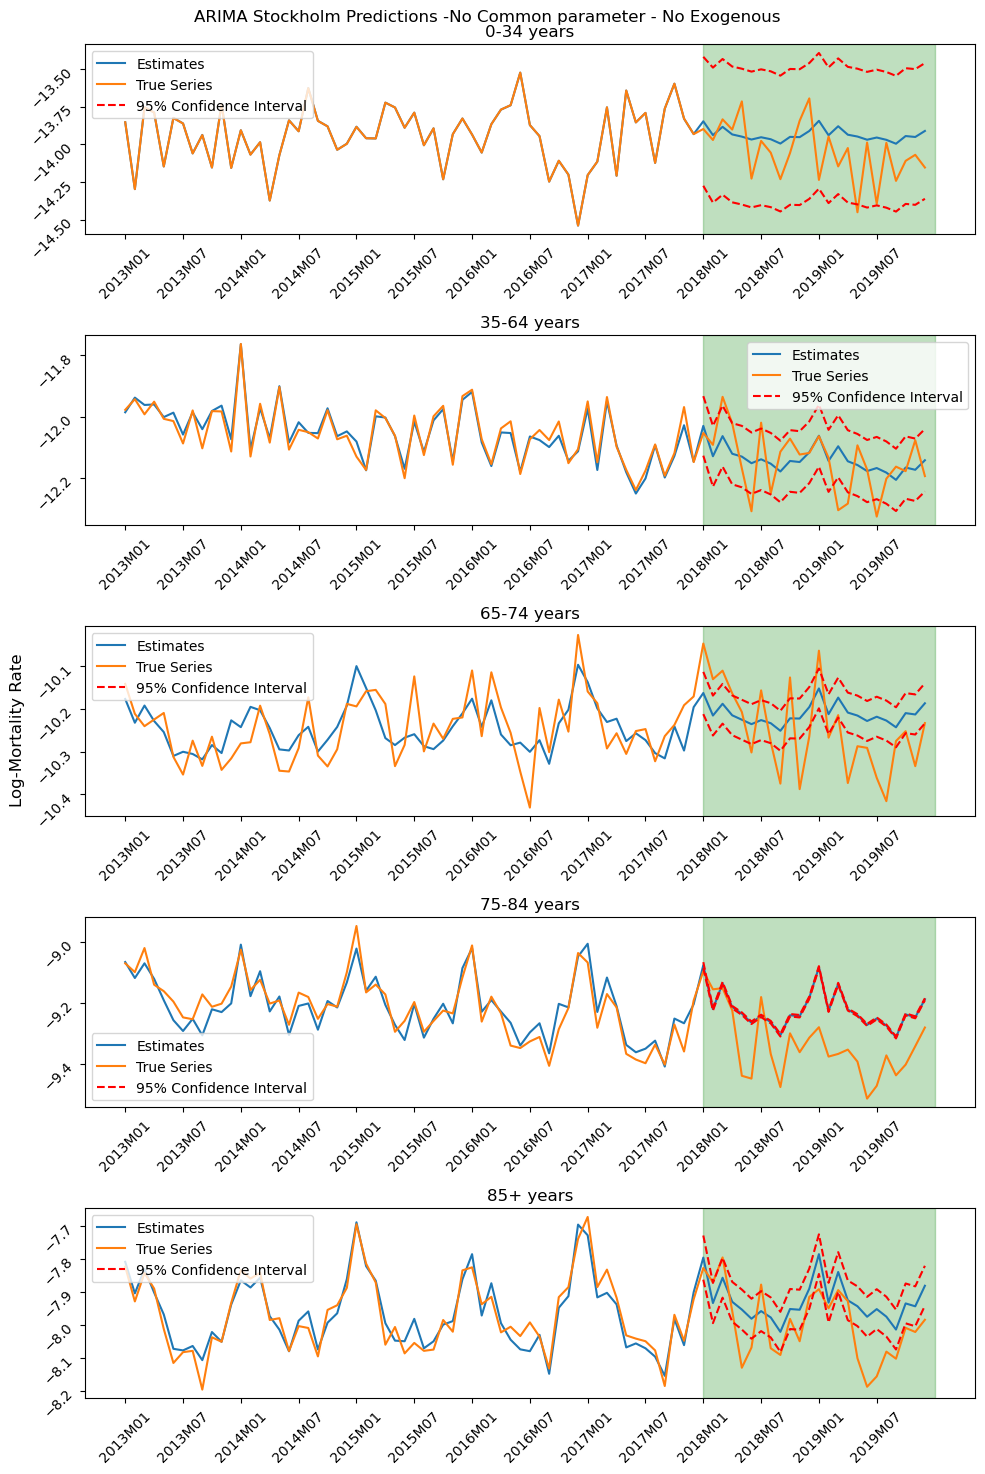

In [218]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(stock_logmort_full,regional_terms = 3,prediction_period = 24,train_period = 60,region_deaths = stock_death,region_pop = stock_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_stock,exogenous_test = exog_test_stock
regional_predictions_nocommout = pd.DataFrame(regional_predictions_nocommout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommout.index = stock_logmort_full.index
regional_predictions_nocommout.columns = stock_logmort_full.columns
regional_predictions_upconf.index = stock_logmort_full.index
regional_predictions_upconf.columns = stock_logmort_full.columns
regional_predictions_lowconf.index = stock_logmort_full.index
regional_predictions_lowconf.columns = stock_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommout.iloc[:,:60],stock_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommout.iloc[:,60:],stock_logmort_full.iloc[:,60:])))
#print(k_t_models["model_0"].summary())

error_NoCom_wout = MAPE(regional_predictions_nocommout.iloc[:,60:],stock_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,24,stock_logmort_full,suptitle = "ARIMA Stockholm Predictions -No Common parameter - No Exogenous ")



In [219]:

print(k_t_models["model_0"].summary())
print("\n")
print(k_t_models["model_1"].summary())
print("\n")
print(k_t_models["model_2"].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  41.585
Date:                Mon, 15 Jul 2024   AIC                            -79.170
Time:                        14:15:31   BIC                            -74.981
Sample:                             0   HQIC                           -77.531
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3458      0.129      2.680      0.007       0.093       0.599
sigma2         0.0146      0.002      5.954      0.000       0.010       0.019
Ljung-Box (L1) (Q):                   0.18   Jarque-

p_value k_t0 before re-estimation: 0.0012712339866762464 

p_value k_t1 before re-estimation: 1.9966443683401447e-14 

Proportion of k_t values which are positive[0.46666667 0.58333333] 

Proportion of b_x values which are positive[0.8 0. ] 

p_value k_t0 after re-estimation: 3.3659596226943158e-06 

p_value k_t1 after re-estimation: 0.002482999472442719 

Model Error 5.122579658496299
Re_estimation error Each Age Group (MAPE): [0.02719497 0.50884206 0.48240542 0.34096768 0.48444485]

 Prediction Error Each Age Group (MAPE)[1.40038152 0.8570623  0.69038175 1.4364719  0.73828219]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  44.796
Date:                Sun, 14 Jul 2024   AIC                            -77.592
Time:                        10:56:23   BIC                            -65.026
Sample:            

<Figure size 640x480 with 0 Axes>

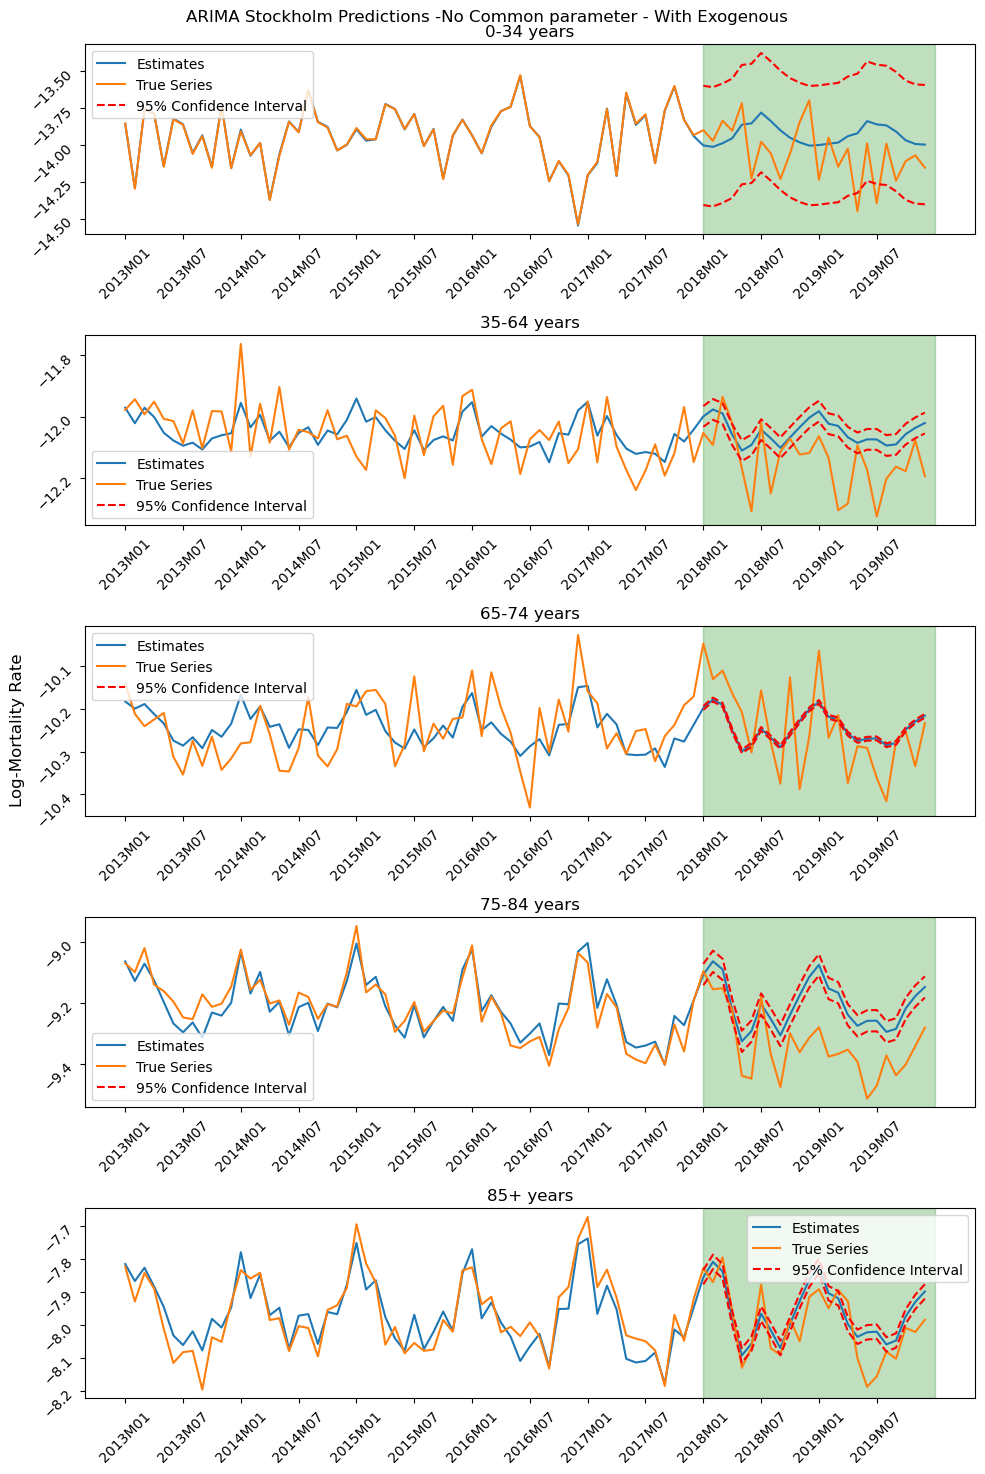

In [195]:
## Model No Common parameter - with Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(stock_logmort_full,regional_terms = 2,prediction_period = 24,train_period = 60,exogenous_train = exog_train_stock,exogenous_test = exog_test_stock,region_deaths = stock_death,region_pop = stock_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_stock,exogenous_test = exog_test_stock
regional_predictions_nocommwith = pd.DataFrame(regional_predictions_nocommwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwith.index = stock_logmort_full.index
regional_predictions_nocommwith.columns = stock_logmort_full.columns
regional_predictions_upconf.index = stock_logmort_full.index
regional_predictions_upconf.columns = stock_logmort_full.columns
regional_predictions_lowconf.index = stock_logmort_full.index
regional_predictions_lowconf.columns = stock_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwith.iloc[:,:60],stock_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_with = MAPE(regional_predictions_nocommwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,24,stock_logmort_full,suptitle = "ARIMA Stockholm Predictions -No Common parameter - With Exogenous ")



In [113]:
print(k_t_models['model_0'].summary())
print("\n")
print(k_t_models['model_1'].summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  44.796
Date:                Wed, 10 Jul 2024   AIC                            -77.591
Time:                        16:20:50   BIC                            -65.025
Sample:                             0   HQIC                           -72.676
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
av_temp       -0.0091      0.004     -2.085      0.037      -0.018      -0.001
av_humid       0.0009      0.001      1.519      0.129      -0.000       0.002
temp_below    -0.0004      0.004     -0.104      0.9

# SARIMAX Models pre-COVID With Common terms

Common k_t3 is white noise with LB p_value 0.8370848936439318
p_value k_t0 before re-estimation: 0.0005654051527176632 

p_value k_t0 after re-estimation: 0.0005654051527176632 

Model Error 4.695894056872898
Re_estimation error Each Age Group (MAPE): [0.05296953 0.51118538 0.45267946 0.4549103  0.65631669]

 Prediction Error Each Age Group (MAPE)[1.18629173 0.63325104 0.71730528 1.10726395 0.82936223]


<Figure size 640x480 with 0 Axes>

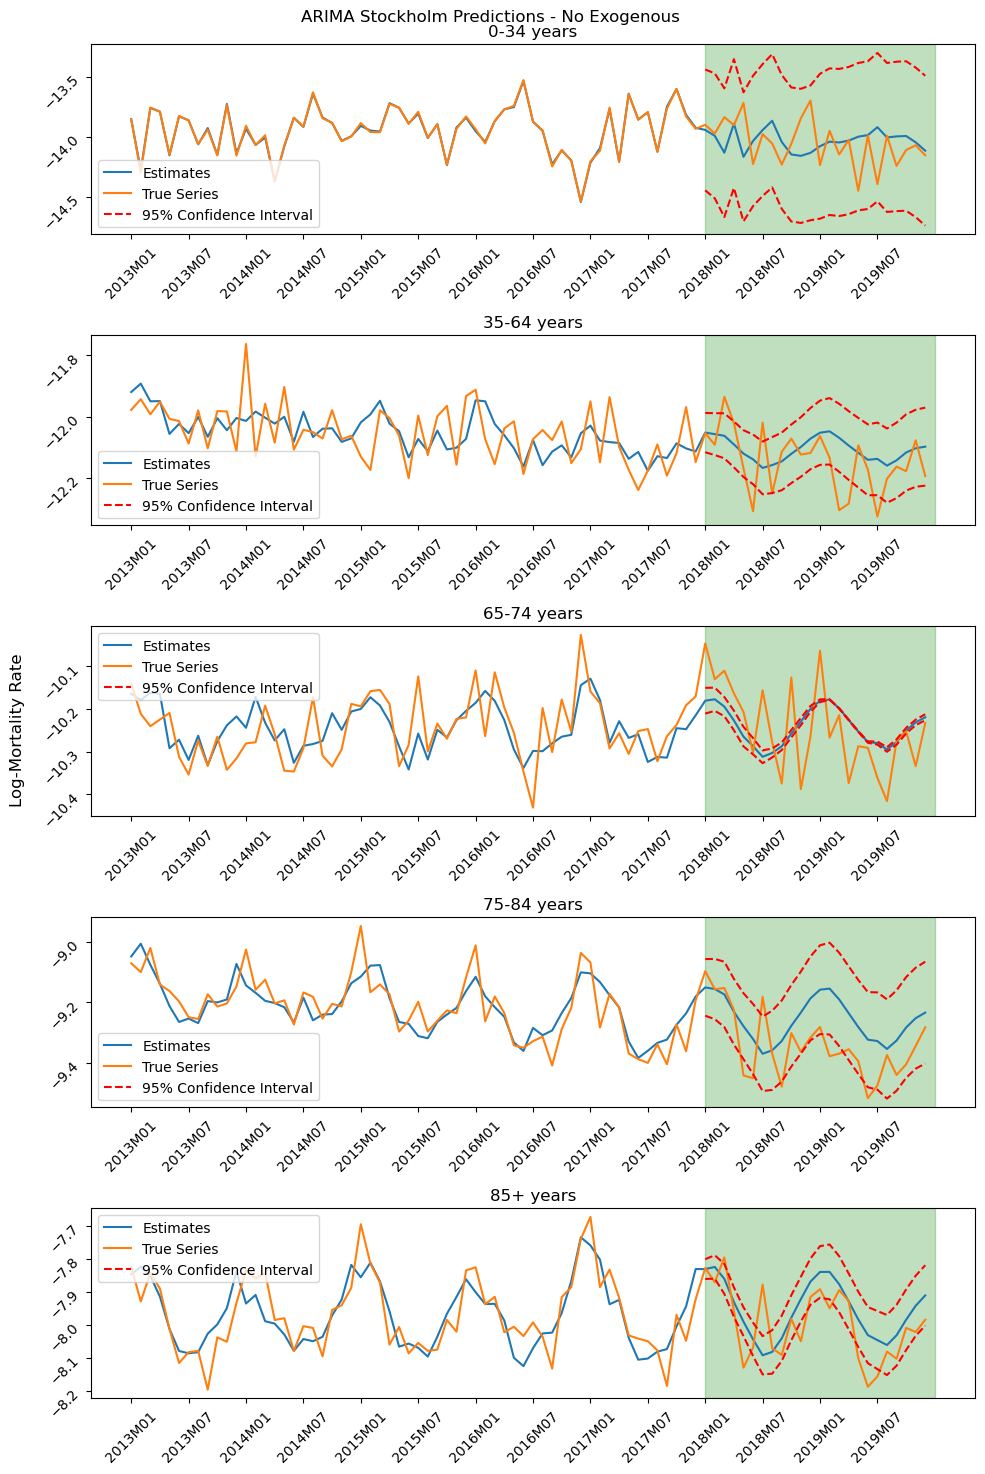

dict_keys(['model_0', 'model_1', 'model_2', 'model_3'])


In [196]:
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort,stock_logmort_full, common_terms = 4,regional_terms = 1,prediction_period = 24,train_period = 60,country_deaths = swe_death, country_pop = swe_pop,region_deaths = stock_death,region_pop = stock_pop,re_est = False,smooth = False)  


regional_predictions_sarout = pd.DataFrame(regional_predictions_sarout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarout.index = stock_logmort_full.index
regional_predictions_sarout.columns = stock_logmort_full.columns
regional_predictions_upconf.index = stock_logmort_full.index
regional_predictions_upconf.columns = stock_logmort_full.columns
regional_predictions_lowconf.index = stock_logmort_full.index
regional_predictions_lowconf.columns = stock_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarout.iloc[:,:60],stock_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarout.iloc[:,60:],stock_logmort_full.iloc[:,60:])))

error_SARIMAX_wout = MAPE(regional_predictions_sarout.iloc[:,60:],stock_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,24,stock_logmort_full,suptitle = "ARIMA Stockholm Predictions - No Exogenous")

print(K_t_models.keys())

In [ ]:

print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_0"].get_params()["order"]) + str(k_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_1"].get_params()["order"]) + str(k_t_models["model_1"].get_params()["seasonal_order"]))



Common k_t3 is white noise with LB p_value 0.8370848936439318
p_value k_t0 before re-estimation: 0.0005654051527176632 

p_value k_t0 after re-estimation: 0.0005654051527176632 

Re_estimation error Each Age Group (MAPE): [0.05296953 0.51118538 0.45267946 0.4549103  0.65631669]

 Prediction Error Each Age Group (MAPE)[1.3774936  0.6351471  0.71420947 1.0998713  0.85215   ]


<Figure size 640x480 with 0 Axes>

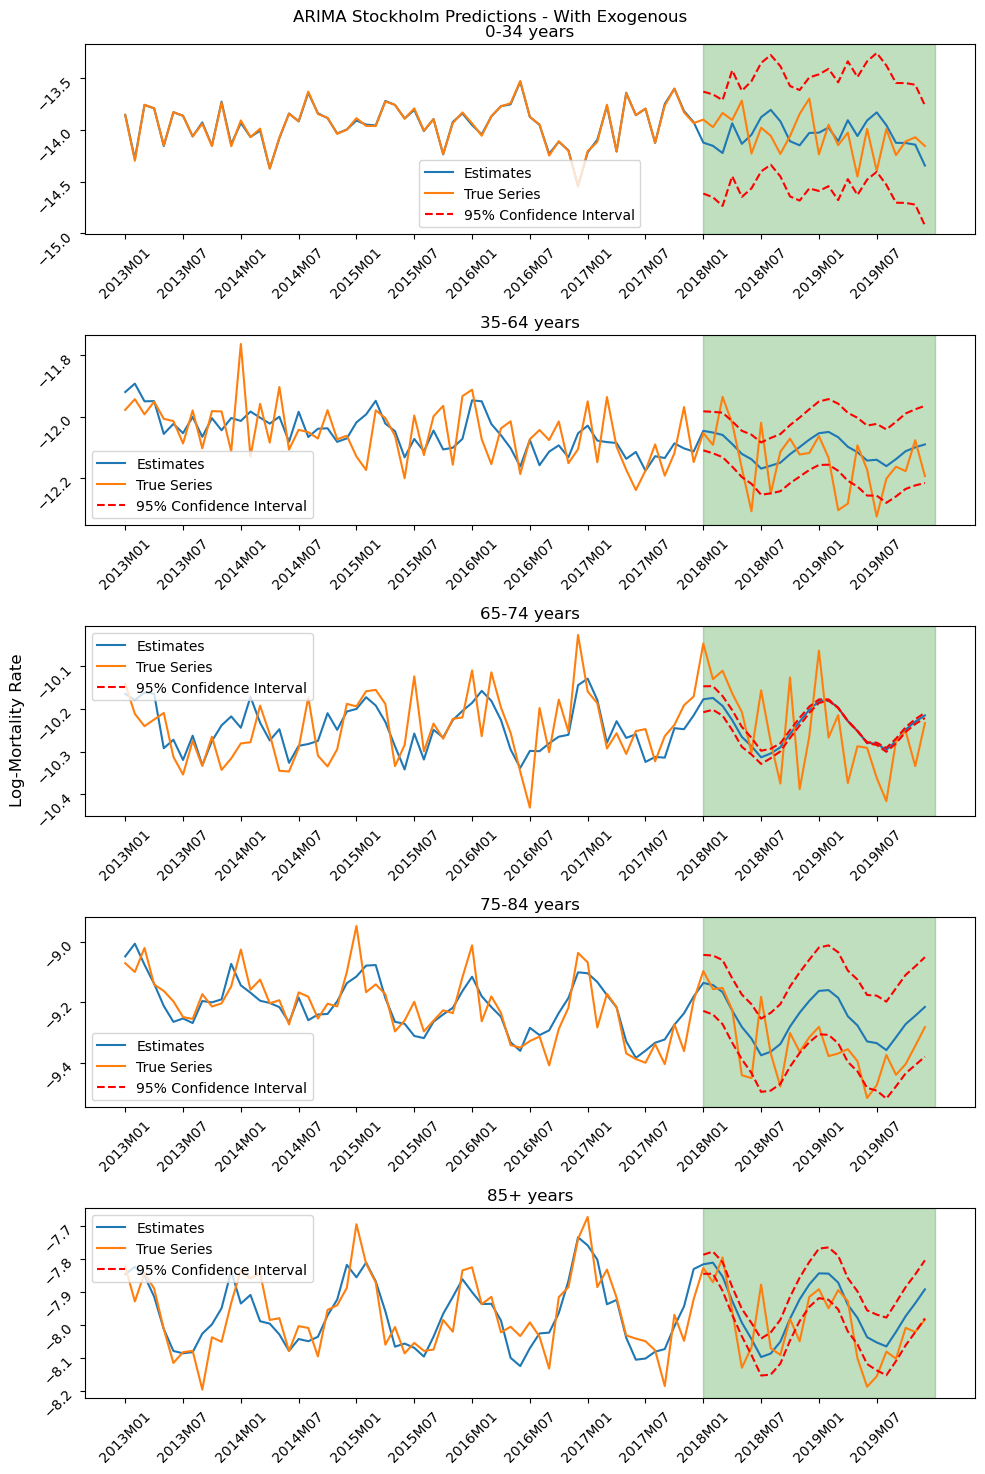

In [197]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort,stock_logmort_full, common_terms = 4,regional_terms = 1,prediction_period = 24,train_period = 60,exogenous_train = exog_train_stock,exogenous_test = exog_test_stock,country_deaths = swe_death, country_pop = swe_pop,region_deaths = stock_death,region_pop = stock_pop,re_est = False,smooth=False)  


regional_predictions_sarwith = pd.DataFrame(regional_predictions_sarwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwith.index = stock_logmort_full.index
regional_predictions_sarwith.columns = stock_logmort_full.columns
regional_predictions_upconf.index = stock_logmort_full.index
regional_predictions_upconf.columns = stock_logmort_full.columns
regional_predictions_lowconf.index = stock_logmort_full.index
regional_predictions_lowconf.columns = stock_logmort_full.columns

print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwith.iloc[:,:60],stock_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])))

#print(str(k_t_models["model_0"].summary()))
#print(k_t_models["model_1"].summary())
error_SARIMAX_w= MAPE(regional_predictions_sarwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])

prediction_plots(regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,24,stock_logmort_full,suptitle = "ARIMA Stockholm Predictions - With Exogenous")



In [ ]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_0"].get_params()["order"]) + str(k_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_1"].get_params()["order"]) + str(k_t_models["model_1"].get_params()["seasonal_order"]))



## VARMAX Models

test_errors[1.71054304 0.61531749 0.83960054 1.0239363  1.61503228]


<Figure size 640x480 with 0 Axes>

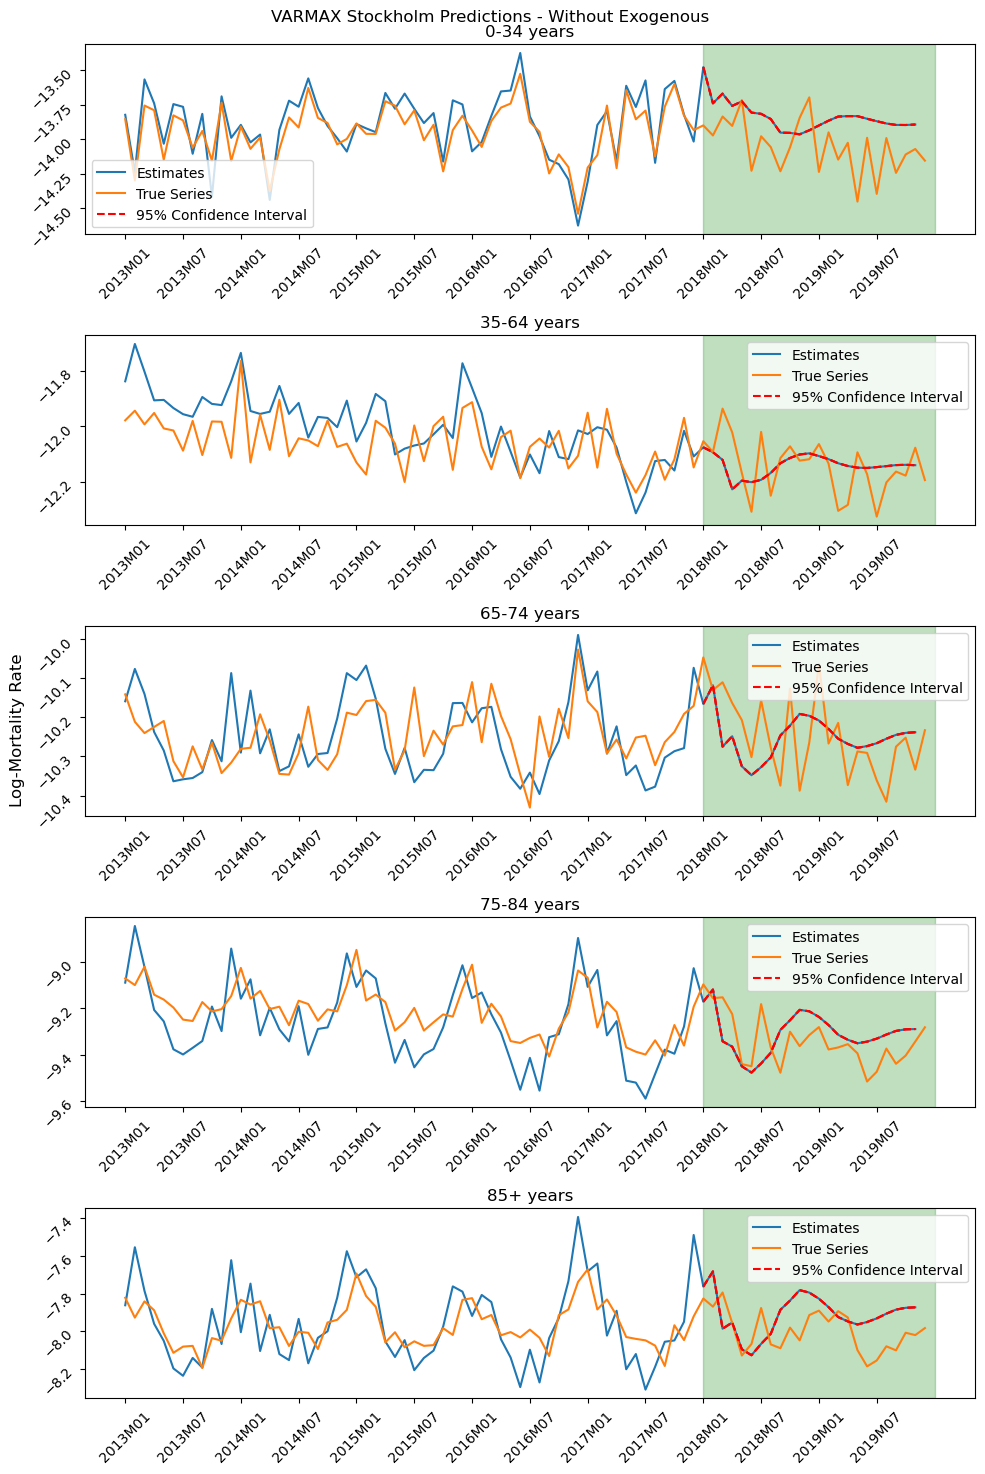

In [198]:
### Without Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varout,predictions_lowconf,predictions_upconf,model_VAR_wout,aic,error_VAR_wout,_,_ = VARMAX_model(all_swe_logmort,stock_logmort_full, common_terms = 3,regional_terms = 3,prediction_period = 24,train_period = 60,AR= 2,MA = 6,country_deaths = swe_death,country_pop = swe_pop,region_deaths = stock_death,region_pop = stock_pop,re_est = False)

print("test_errors" + str(error_VAR_wout))
prediction_plots(predictions_varout,predictions_varout,predictions_varout,24,stock_logmort_full,suptitle = "VARMAX Stockholm Predictions - Without Exogenous")



test_errors[1.54893593 1.0590183  1.12708303 1.10973518 2.59376183]


<Figure size 640x480 with 0 Axes>

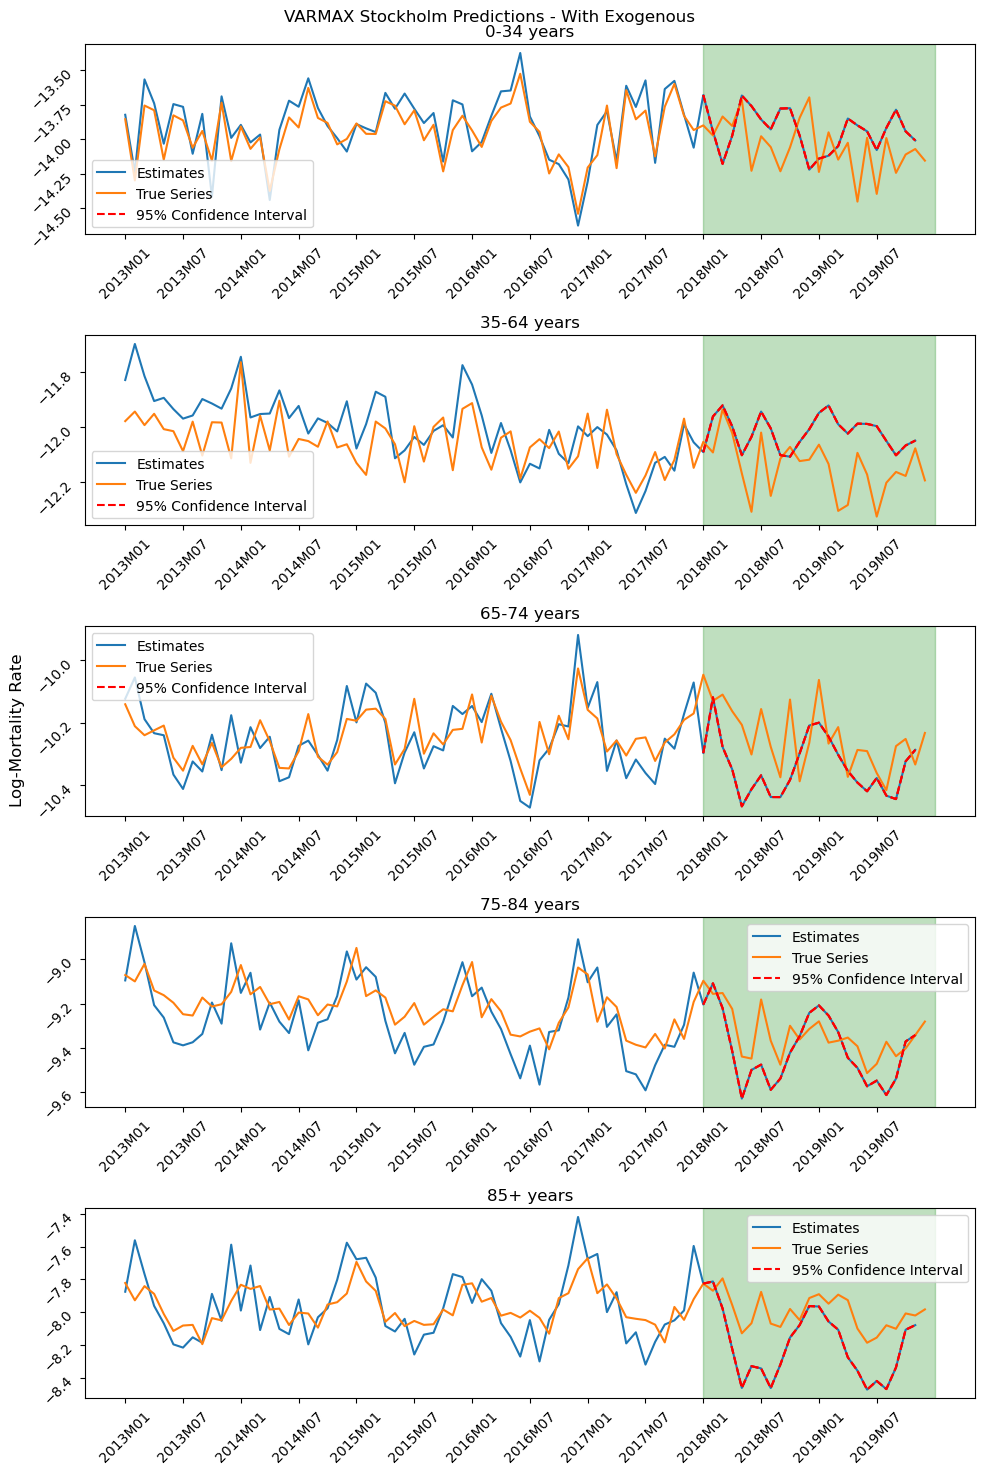

In [199]:
### With Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varwith,predictions_lowconf,predictions_upconf,model_VAR_with,aic,error_VAR_w,_,_ = VARMAX_model(all_swe_logmort,stock_logmort_full, common_terms = 3,regional_terms = 4,prediction_period = 24,train_period = 60,AR= 2,MA = 5,exogenous_train = exog_train_stock,exogenous_test = exog_test_stock,country_deaths = swe_death,country_pop = swe_pop,region_deaths = stock_death,region_pop = stock_pop,re_est = False)

print("test_errors" + str(error_VAR_w))
prediction_plots(predictions_varwith,predictions_varwith,predictions_varwith,24,stock_logmort_full,suptitle = "VARMAX Stockholm Predictions - With Exogenous")



In [363]:
model_VAR_with.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     [0, 1, 2, 3, 4, 5, 6]   No. Observations:                   60
Model:                       VARMAX(2,5)   Log Likelihood                  83.991
                             + intercept   AIC                            658.017
Date:                   Thu, 27 Jun 2024   BIC                           1522.981
Time:                           11:16:56   HQIC                           996.352
Sample:                                0                                         
                                    - 60                                         
Covariance Type:                     opg                                         
===================================================================================================================================
Ljung-Box (L1) (Q):     4.05, 0.07, 2.01, 0.36, 0.13, 1.45, 0.40   Jarque-Bera (JB):       2.37, 0.69, 0.03, 6.38, 0.55, 0.03, 1.32
Prob(Q):                0.04, 0.80, 0.16, 0.55, 0.72, 0.23, 0.53   Prob(JB):               0.31, 0.71, 0.99, 0.04, 0.76, 0.98, 0.52
Heteroskedasticity (H): 2.57, 1.91, 1.22, 2.62, 1.81, 1.25, 2.07   Skew:               0.24, 0.04, -0.05, 0.79, -0.23, -0.04, -0.32
Prob(H) (two-sided):    0.04, 0.16, 0.66, 0.04, 0.19, 0.63, 0.11   Kurtosis:               3.85, 2.48, 3.04, 3.24, 3.03, 3.07, 2.64
                               Results for equation 0                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.1569      0.005    -30.258      0.000      -0.167      -0.147
L1.0                0.0648      0.006     10.122      0.000       0.052       0.077
L1.1                0.0656      0.018      3.655      0.000       0.030       0.101
L1.2               -0.1477      0.009    -16.336      0.000      -0.165      -0.130
L1.3               -0.1329      0.012    -10.893      0.000      -0.157      -0.109
L1.4               -0.0665      0.005    -13.686      0.000      -0.076      -0.057
L1.5               -0.0139      0.007     -1.902      0.057      -0.028       0.000
L1.6               -0.0084      0.013     -0.663      0.508      -0.033       0.016
L2.0                0.5425      0.126      4.303      0.000       0.295       0.790
L2.1               -0.0676      0.026     -2.613      0.009      -0.118      -0.017
L2.2               -0.1818      0.037     -4.871      0.000      -0.255      -0.109
L2.3                0.3097      0.055      5.596      0.000       0.201       0.418
L2.4               -0.4074      0.098     -4.157      0.000      -0.599      -0.215
L2.5               -0.3135      0.057     -5.535      0.000      -0.425      -0.202
L2.6               -0.0217      0.017     -1.268      0.205      -0.055       0.012
L1.e(0)            -0.2624      0.026     -9.955      0.000      -0.314      -0.211
L1.e(1)             0.3086      0.019     16.355      0.000       0.272       0.346
L1.e(2)            -0.1112      0.030     -3.670      0.000      -0.171      -0.052
L1.e(3)             0.0617      0.024      2.539      0.011       0.014       0.109
L1.e(4)            -0.1091      0.018     -5.902      0.000      -0.145      -0.073
L1.e(5)             0.0222      0.008      2.746      0.006       0.006       0.038
L1.e(6)            -0.0290      0.027     -1.074      0.283      -0.082       0.024
L2.e(0)             0.0368      0.068      0.541      0.589      -0.097       0.170
L2.e(1)             0.0750      0.032      2.310      0.021       0.011       0.139
L2.e(2)            -0.1356      0.037     -3.651      0.000      -0.208      -0.063
L2.e(3)             0.0871      0.06

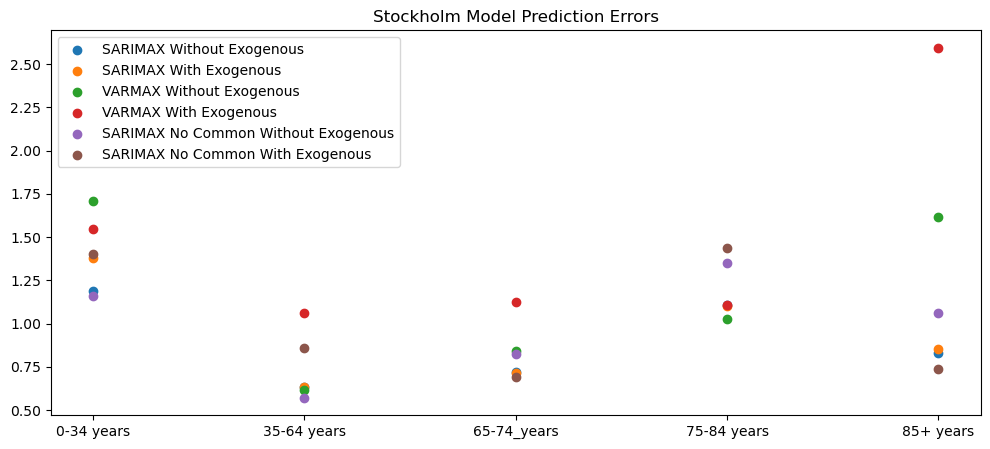

In [200]:
test_errors = np.vstack((error_SARIMAX_wout,error_SARIMAX_w,error_VAR_wout,error_VAR_w,error_NoCom_wout,error_NoCom_with))
stockholm = test_errors

age_groups = ["0-34 years","35-64 years","65-74_years","75-84 years","85+ years"]
plt.figure(figsize = (12,5))
plt.scatter(age_groups,stockholm[0,:],label = "SARIMAX Without Exogenous")
plt.scatter(age_groups,stockholm[1,:],label = "SARIMAX With Exogenous")
plt.scatter(age_groups,stockholm[2,:],label = "VARMAX Without Exogenous")
plt.scatter(age_groups,stockholm[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,stockholm[4,:],label = "SARIMAX No Common Without Exogenous")
plt.scatter(age_groups,stockholm[5,:],label = "SARIMAX No Common With Exogenous")
plt.legend();
plt.title("Stockholm Model Prediction Errors");

In [28]:
np.mean(stockholm,axis = 1)


array([1.36629975, 1.34704251, 1.87060164, 2.01129692, 1.51008421,
       1.52798773])

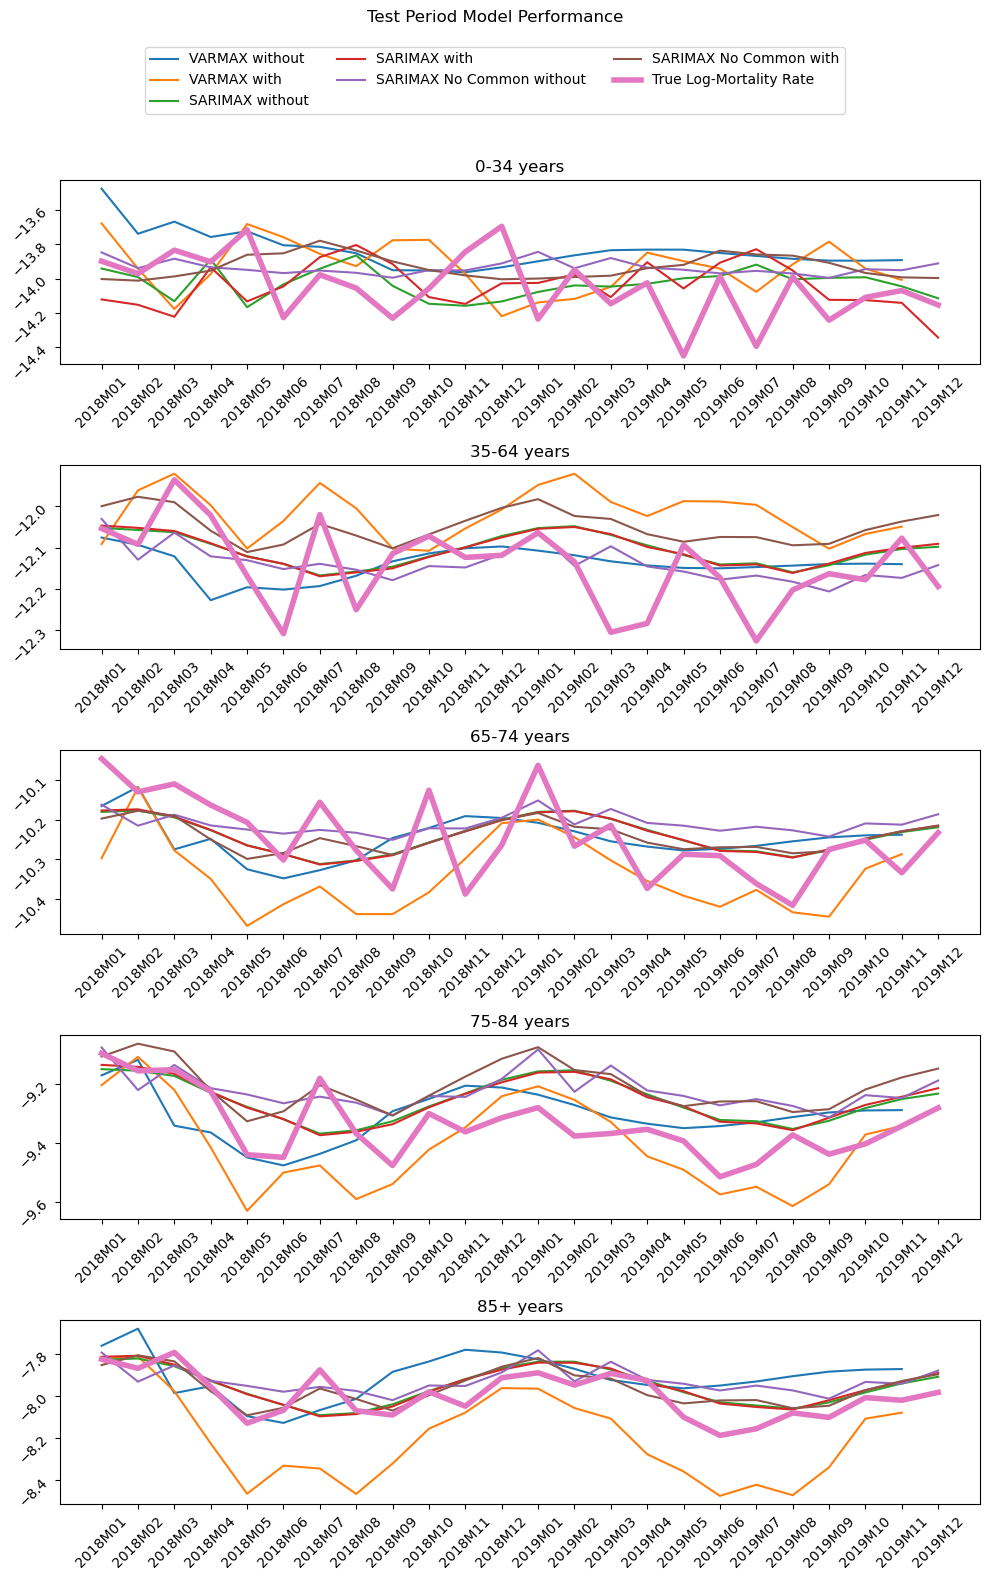

In [201]:
predictions_varwith = pd.DataFrame(predictions_varwith)
predictions_varwith.index = stock_logmort_full.index
predictions_varwith.columns = stock_logmort_full.columns

predictions_varout = pd.DataFrame(predictions_varout)
predictions_varout.index = stock_logmort_full.index
predictions_varout.columns = stock_logmort_full.columns



age_groups = ["0-34 years", "35-64 years", "65-74 years", "75-84 years", "85+ years"]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(5):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_varout.iloc[row, 60:], label="VARMAX without")
    line2, = axes[row].plot(predictions_varwith.iloc[row, 60:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_sarout.iloc[row, 60:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwith.iloc[row, 60:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommout.iloc[row, 60:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwith.iloc[row, 60:], label="SARIMAX No Common with")
    line7, = axes[row].plot(stock_logmort_full.iloc[row, 60:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# COVID Period Modelling

2020M01   2020M02   2020M03   2020M04   2020M05   2020M06   2020M07  \
0  0.001174  0.001872  0.001173  0.001476  0.001173  0.001475  0.001173   
1  0.001057  0.001687  0.001059  0.001333  0.001061  0.001335  0.001062   
2  0.000233  0.000372  0.000233  0.000293  0.000233  0.000293  0.000232   
3  0.000158  0.000253  0.000159  0.000201  0.000161  0.000203  0.000162   
4  0.000059  0.000095  0.000059  0.000075  0.000059  0.000074  0.000059   

    2020M08   2020M09   2020M10  ...   2022M03   2022M04   2022M05   2022M06  \
0  0.001172  0.001475  0.001172  ...  0.001176  0.001479  0.001176  0.001479   
1  0.001063  0.001339  0.001065  ...  0.001085  0.001366  0.001088  0.001370   
2  0.000232  0.000292  0.000232  ...  0.000231  0.000291  0.000231  0.000291   
3  0.000163  0.000205  0.000164  ...  0.000175  0.000221  0.000176  0.000222   
4  0.000059  0.000074  0.000059  ...  0.000061  0.000077  0.000062  0.000078   

    2022M07   2022M08   2022M09   2022M10   2022M11   2022M12  
0  0.001176  0.001176  0.001479  0.001176  0.001479  0.001176  
1  0.001091  0.001092  0.001376  0.001095  0.001380  0.001098  
2  0.000231  0.000231  0.000291  0.000232  0.000291  0.000232  
3  0.000177  0.000178  0.000224  0.000179  0.000225  0.000180  
4  0.000062  0.000062  0.000079  0.000063  0.000079  0.000063  

[5 rows x 36 columns]

p_value k_t0 before re-estimation: 0.12209000788033506 

Regional k_t0 is white noise with LB p_value 0.12209000788033506 

p_value k_t1 before re-estimation: 1.5710588829106282e-56 

Proportion of k_t values which are positive[0.42857143 0.5       ] 

Proportion of b_x values which are positive[0.  0.2] 

p_value k_t0 after re-estimation: 0.47422180720799695 

Regional k_t0 is white noise with LB p_value 0.47422180720799695 

p_value k_t1 after re-estimation: 1.0240752718538705e-16 

Model Error 6.320852075673718
Re_estimation error Each Age Group (MAPE): [0.05583868 0.48127804 0.52212137 0.34200329 0.54562307]

 Prediction Error Each Age Group (MAPE)[1.56990772 0.87084633 1.05072468 1.14740888 1.68196446]


<Figure size 640x480 with 0 Axes>

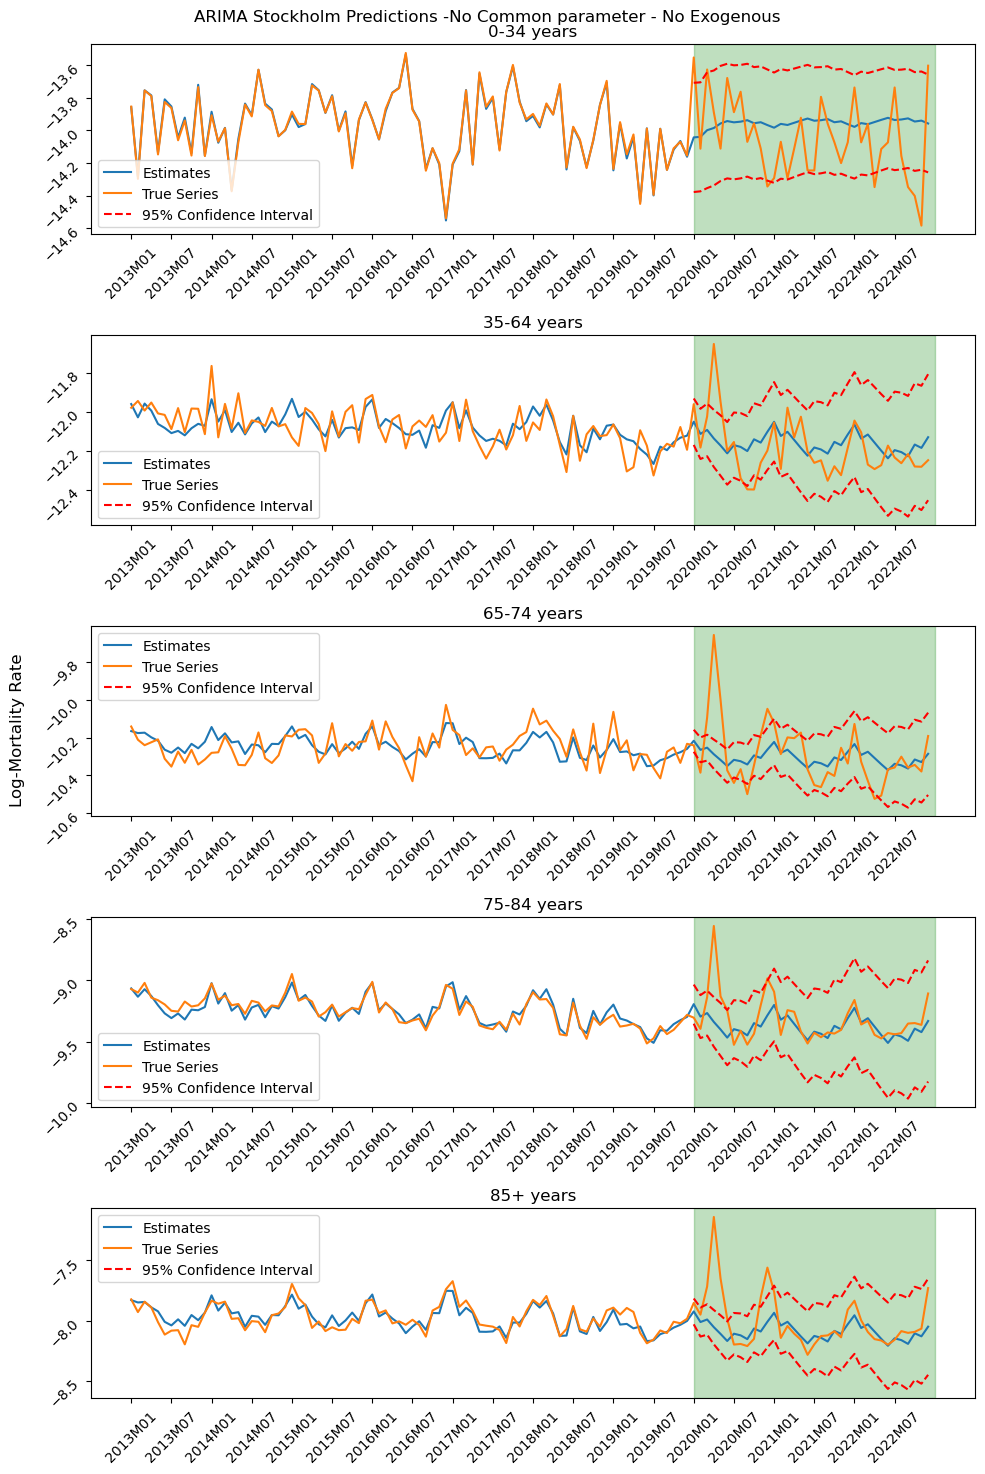

In [250]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(stock_logmort_incCOVID,regional_terms = 2,prediction_period = 36,train_period = 84,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_stock,exogenous_test = exog_test_stock
regional_predictions_nocommoutCOVID = pd.DataFrame(regional_predictions_nocommoutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommoutCOVID.index = stock_logmort_incCOVID.index
regional_predictions_nocommoutCOVID.columns = stock_logmort_incCOVID.columns
regional_predictions_upconf.index = stock_logmort_incCOVID.index
regional_predictions_upconf.columns = stock_logmort_incCOVID.columns
regional_predictions_lowconf.index = stock_logmort_incCOVID.index
regional_predictions_lowconf.columns = stock_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,:84],stock_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+b_xs@np.diag(D)[:2,:2]@k_t_preds[:,84:]),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)

error_NoCom_woutCOVID = MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,stock_logmort_incCOVID,suptitle = "ARIMA Stockholm Predictions -No Common parameter - No Exogenous ")



2020M01       2020M02       2020M03       2020M04       2020M05  \
0  1041769.0  1.113435e+06  1.041432e+06  1.075973e+06  1.041095e+06   
1   937988.0  1.003559e+06  9.396382e+05  9.718120e+05  9.412883e+05   
2   207004.0  2.211490e+05  2.067587e+05  2.135239e+05  2.065133e+05   
3   140356.0  1.506413e+05  1.414890e+05  1.467907e+05  1.426220e+05   
4    52675.0  5.627578e+04  5.261517e+04  5.433809e+04  5.255533e+04   

        2020M06    2020M07       2020M08       2020M09     2020M10  ...  \
0  1.075624e+06  1040758.5  1.040590e+06  1.075102e+06  1040253.25  ...   
1  9.735172e+05   942938.5  9.437636e+05  9.760750e+05   945413.75  ...   
2  2.132704e+05   206268.0  2.061453e+05  2.128901e+05   205900.00  ...   
3  1.479615e+05   143755.0  1.443215e+05  1.497176e+05   145454.50  ...   
4  5.427626e+04    52495.5  5.246558e+04  5.418352e+04    52405.75  ...   

        2022M03       2022M04       2022M05       2022M06    2022M07  \
0  1.043594e+06  1.078363e+06  1.043561e+06  1.078330e+06  1043529.0   
1  9.626418e+05  9.961098e+05  9.653127e+05  9.988697e+05   967983.5   
2  2.051502e+05  2.120449e+05  2.052593e+05  2.121577e+05   205368.5   
3  1.552650e+05  1.609225e+05  1.561980e+05  1.618866e+05   157131.0   
4  5.449283e+04  5.648432e+04  5.483167e+04  5.683445e+04    55170.5   

        2022M08       2022M09     2022M10       2022M11       2022M12  
0  1.043513e+06  1.078280e+06  1043480.50  1.078246e+06  1.043448e+06  
1  9.693189e+05  1.003009e+06   971989.75  1.005769e+06  9.746606e+05  
2  2.054231e+05  2.123269e+05   205532.25  2.124397e+05  2.056414e+05  
3  1.575975e+05  1.633328e+05   158530.50  1.642969e+05  1.594635e+05  
4  5.533992e+04  5.735964e+04    55678.75  5.770977e+04  5.601758e+04  

[5 rows x 36 columns]

In [251]:
stock_NoCom_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_NoCom_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_NoCom_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_NoCom_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

In [82]:
exog_train_stock_COVID.iloc[:,:2]
exog_test_stock_COVID.iloc[:,:2]

av_temp   av_humid
0    4.119355  80.403226
1    2.806897  76.400000
2    3.396774  67.990323
3    6.943333  56.036667
4    9.790323  63.038710
5   18.443333  58.880000
6   16.848387  67.500000
7   18.954839  64.822581
8   13.836667  78.300000
9    9.283871  85.054839
10   6.823333  84.990000
11   3.941935  89.322581
12  -1.235484  89.806452
13  -2.267857  82.057143
14   3.312903  68.596774
15   5.163333  57.993333
16  10.416129  69.667742
17  19.156667  63.280000
18  21.061290  63.080645
19  15.832258  74.896774
20  12.460000  74.170000
21   9.232258  80.151613
22   3.633333  83.333333
23  -1.700000  84.422581
24   0.425806  81.119355
25   0.792857  79.025000
26   3.619355  59.948387
27   5.330000  60.293333
28  11.232258  60.506452
29  17.863333  65.540000
30  18.258065  64.674194
31  19.525806  68.367742
32  11.403333  78.316667
33   9.625806  82.903226
34   5.166667  88.503333
35  -1.870968  88.906452

p_value k_t0 before re-estimation: 0.12209000788033506 

Regional k_t0 is white noise with LB p_value 0.12209000788033506 

p_value k_t1 before re-estimation: 1.5710588829106282e-56 

p_value k_t2 before re-estimation: 1.7709992057956557e-08 

Proportion of k_t values which are positive[0.42857143 0.5        0.53571429] 

Proportion of b_x values which are positive[0.  0.2 0.4] 

p_value k_t0 after re-estimation: 0.47422180720799695 

Regional k_t0 is white noise with LB p_value 0.47422180720799695 

p_value k_t1 after re-estimation: 1.0240752718538705e-16 

p_value k_t2 after re-estimation: 1.6023547226256714e-06 

Model Error 6.288486593421414
Re_estimation error Each Age Group (MAPE): [0.00678214 0.16893547 0.42858413 0.33975467 0.36166964]

 Prediction Error Each Age Group (MAPE)[1.5565389  0.90607067 1.05813759 1.13528266 1.63245679]


<Figure size 640x480 with 0 Axes>

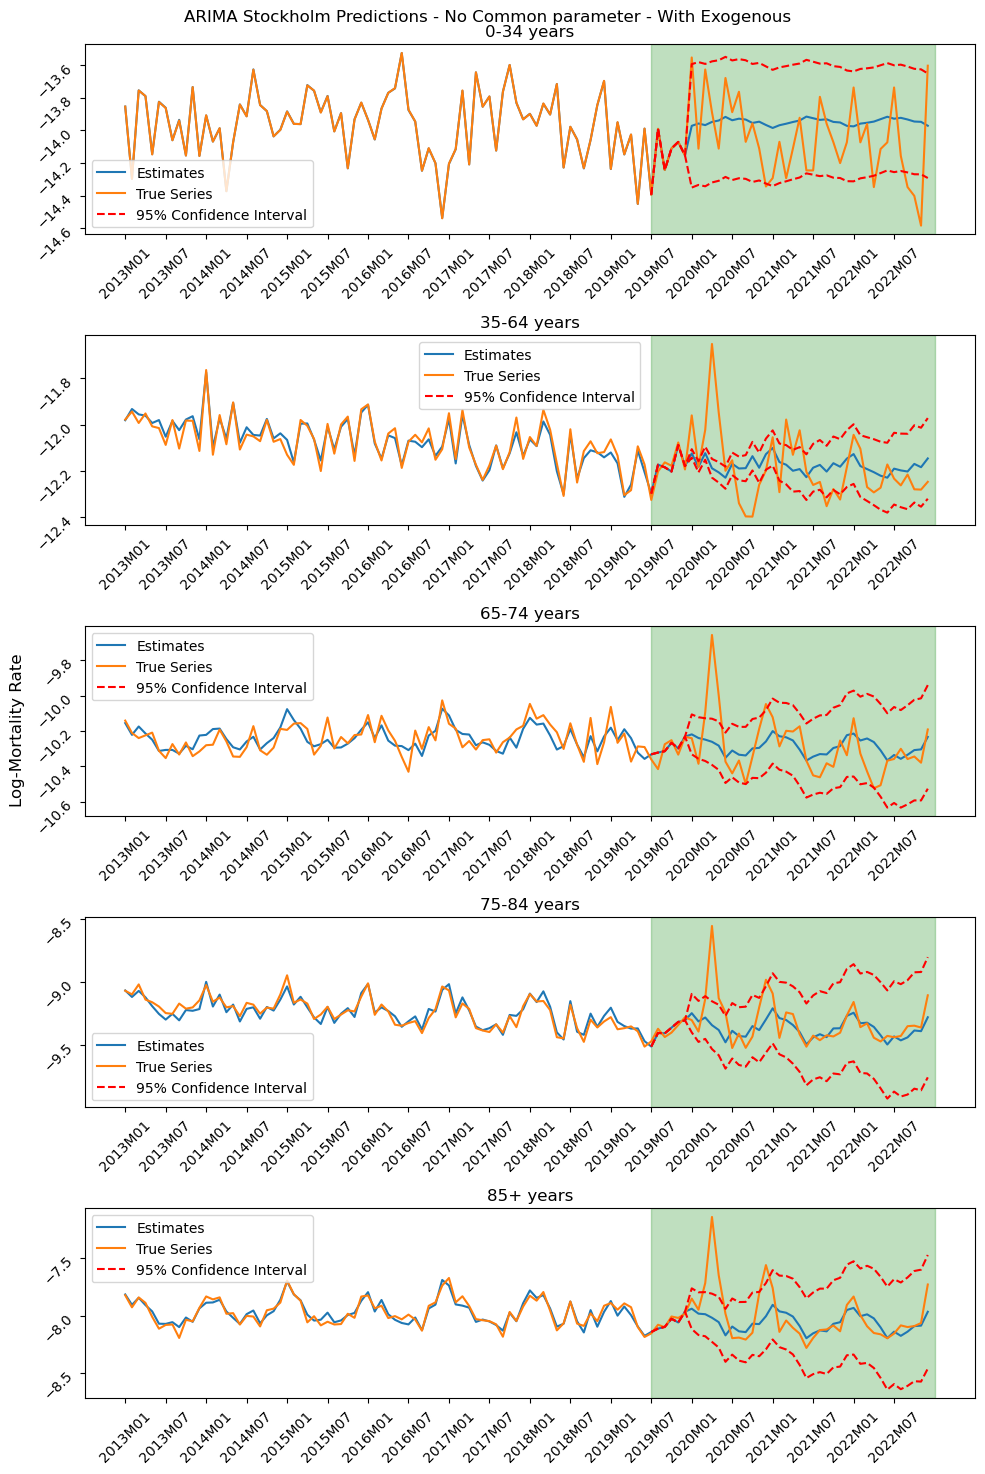

In [257]:
## Model No Common parameter - With Exogenous
exog_train_stock_COVID_2 = exog_train_stock_COVID.iloc[:,:2]
exog_test_stock_COVID_2 = exog_test_stock_COVID.iloc[:,:2]
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(stock_logmort_incCOVID,regional_terms = 3,prediction_period = 36,train_period = 84,exogenous_train = exog_train_stock_COVID_2,exogenous_test = exog_test_stock_COVID_2,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_stock,exogenous_test = exog_test_stock
regional_predictions_nocommwithCOVID = pd.DataFrame(regional_predictions_nocommwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwithCOVID.index = stock_logmort_incCOVID.index
regional_predictions_nocommwithCOVID.columns = stock_logmort_incCOVID.columns
regional_predictions_upconf.index = stock_logmort_incCOVID.index
regional_predictions_upconf.columns = stock_logmort_incCOVID.columns
regional_predictions_lowconf.index = stock_logmort_incCOVID.index
regional_predictions_lowconf.columns = stock_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,:84],stock_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+ b_xs@np.diag(D)[:3,:3]@k_t_preds[:,84:]),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)



error_NoCom_withCOVID = MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,42,stock_logmort_incCOVID,suptitle = "ARIMA Stockholm Predictions - No Common parameter - With Exogenous ")



In [253]:
stock_NoCom_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_NoCom_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_NoCom_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_NoCom_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

In [123]:
k_t_models["model_1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood                 121.274
Date:                              Tue, 18 Jun 2024   AIC                           -220.548
Time:                                      16:08:01   BIC                           -193.941
Sample:                                           0   HQIC                          -209.859
                                               - 84                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.002      1.711      0.087      -0.000       0.007
av_temp        0.0100      0.003      3.824      0.000       0.005       0.015
av_humid      -0.0009      0.001     -0.843      0.399      -0.003       0.001
temp_below    -0.0017      0.002     -0.873      0.383      -0.005       0.002
temp_above    -0.0108      0.002     -5.958      0.000      -0.014      -0.007
hols           0.0009      0.001      0.932      0.352      -0.001       0.003
ar.L1         -0.7441      0.113     -6.576      0.000      -0.966      -0.522
ma.L1          0.0426      0.127      0.336      0.737      -0.206       0.291
ma.L2         -0.9065      0.092     -9.855      0.000      -1.087      -0.726
ma.S.L12       0.5811      0.130      4.455      0.000       0.325       0.837
sigma2         0.0029      0.001      5.327      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.75   Prob(JB):                         0.93
Heteroskedasticity (H):               1.85   Skew:                             0.06
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p_value k_t0 before re-estimation: 0.00750922025931689 

p_value k_t1 before re-estimation: 0.37347816632171865 

Regional k_t1 is white noise with LB p_value 0.37347816632171865 

p_value k_t2 before re-estimation: 0.004990127755486152 

p_value k_t3 before re-estimation: 0.48718505245928556 

Regional k_t3 is white noise with LB p_value 0.48718505245928556 

p_value k_t0 after re-estimation: 0.00750922025931689 

p_value k_t1 after re-estimation: 0.37347816632171826 

Regional k_t1 is white noise with LB p_value 0.37347816632171826 

p_value k_t2 after re-estimation: 0.004990127755486152 

p_value k_t3 after re-estimation: 0.4871850524592851 

Regional k_t3 is white noise with LB p_value 0.4871850524592851 

Model Error 8.00250972960983
Re_estimation error Each Age Group (MAPE): [0.0032935  0.11941829 0.06391392 0.34474672 0.27706853]

 Prediction Error Each Age Group (MAPE)[1.35259629 0.82638356 1.20325248 1.23284509 1.63723067]

Predicted number of deaths for COVID period [  894.  

<Figure size 640x480 with 0 Axes>

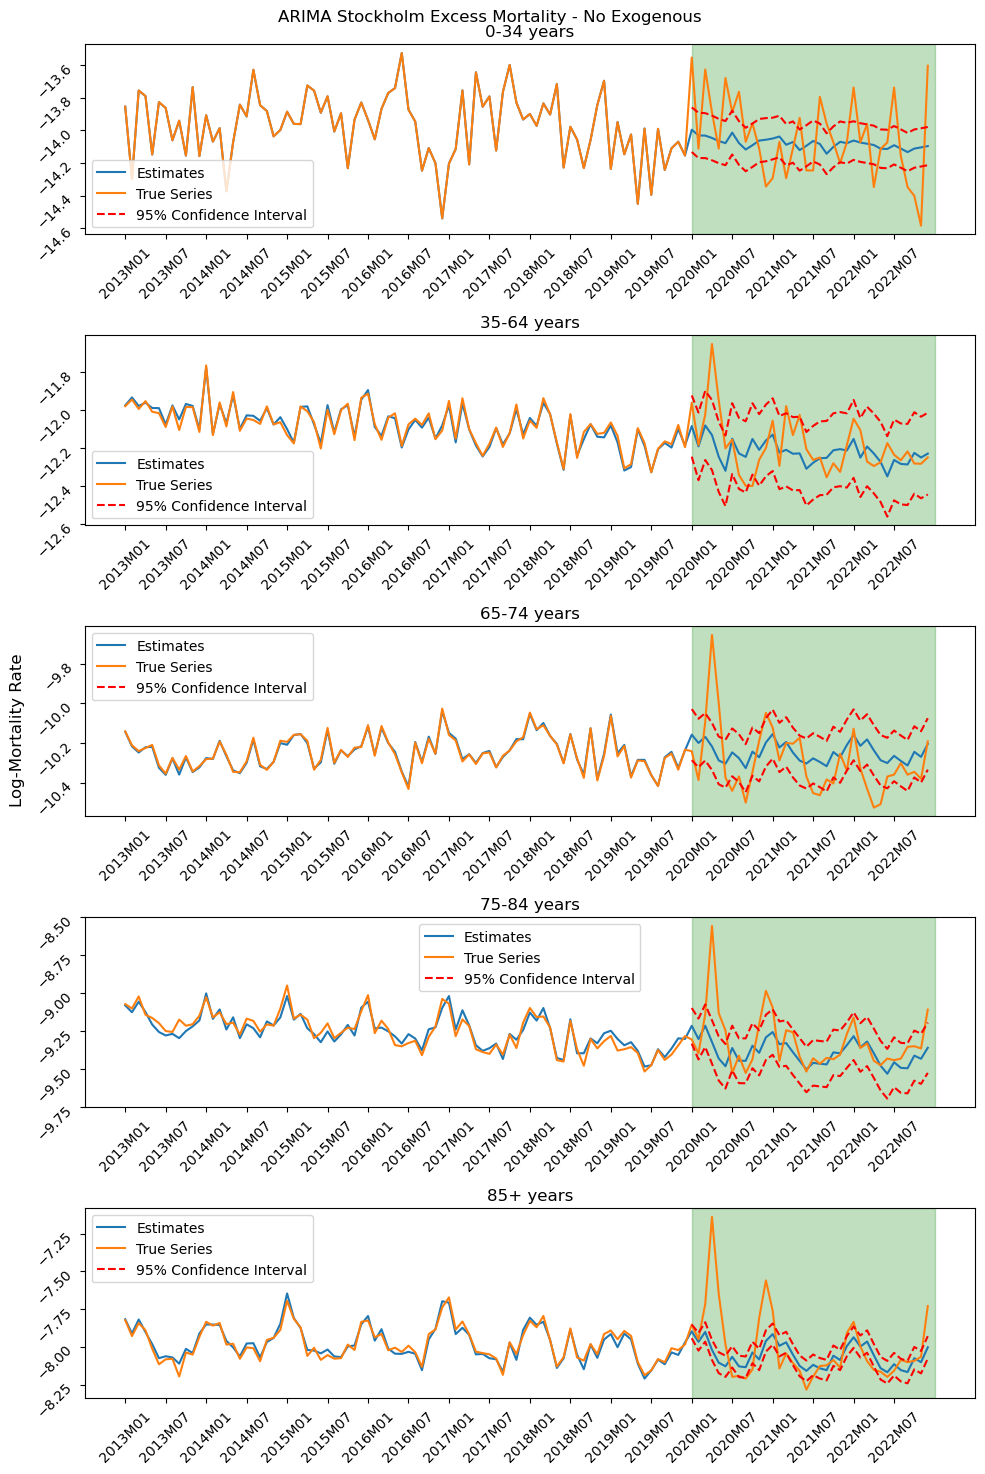

In [206]:
### Without Exogenous 2 common 4 regional 
com_terms = 2
reg_terms = 4
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarout,K_t_preds,k_t_preds,regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D_country,D = full_model(all_swe_logmort_incCOVID,stock_logmort_incCOVID, common_terms = com_terms,regional_terms = reg_terms,prediction_period = 36,train_period = 84,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False,smooth = False)  


regional_predictions_saroutCOVID = pd.DataFrame(regional_predictions_saroutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_saroutCOVID.index = stock_logmort_incCOVID.index
regional_predictions_saroutCOVID.columns = stock_logmort_incCOVID.columns
regional_predictions_upconf.index = stock_logmort_incCOVID.index
regional_predictions_upconf.columns = stock_logmort_incCOVID.columns
regional_predictions_lowconf.index = stock_logmort_incCOVID.index
regional_predictions_lowconf.columns = stock_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_saroutCOVID.iloc[:,:84],stock_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_saroutCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])))

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@np.diag(D_country)[:com_terms,:com_terms]@K_t_preds[:,84:] + b_xs@np.diag(D)[:reg_terms,:reg_terms]@k_t_preds[:,84:]),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


regional_predictions_saroutCOVID
error_SARIMAX_woutCOVID = MAPE(regional_predictions_saroutCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,stock_logmort_incCOVID,suptitle = "ARIMA Stockholm Excess Mortality - No Exogenous") #ARIMA Stockholm Excess Mortality - No Exogenous


In [207]:


stock_ARIMA_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_ARIMA_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_ARIMA_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_ARIMA_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

stock_actual_deaths_20 = stock_death_full.iloc[:,84:90].sum(axis = 1)
stock_actual_deaths_20_21 = epi_year(stock_death_full.iloc[:,84:])["year_0"].sum(axis = 1)
stock_actual_deaths_21_22 = epi_year(stock_death_full.iloc[:,84:])["year_1"].sum(axis = 1)
stock_actual_deaths_22 = epi_year(stock_death_full.iloc[:,84:])["year_2"].sum(axis = 1) #only second half of 2022 


In [178]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarout["model_0"].get_params()["order"]) + str(k_t_models_sarout["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_1"].get_params()["order"]) + str(k_t_models_sarout["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_2"].get_params()["order"]) + str(k_t_models_sarout["model_2"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_3"].get_params()["order"]) + str(k_t_models_sarout["model_3"].get_params()["seasonal_order"]))

import statsmodels.api as sm

print(np.linalg.norm(k_ts[0,:]))

sm.stats.acorr_ljungbox(k_ts[0,:], lags=[83]).iloc[0,1]

(1, 1, 1)(2, 0, 1, 12)
(2, 0, 0)(2, 0, 0, 12)
-
(0, 0, 0)(0, 0, 0, 12)
(4, 1, 1)(0, 0, 0, 12)
(0, 0, 0)(0, 0, 0, 12)
(4, 1, 1)(0, 0, 0, 12)
0.9999999999999999


0.007772930408924467

p_value k_t0 before re-estimation: 0.23739156793242946 

Regional k_t0 is white noise with LB p_value 0.23739156793242946 

p_value k_t1 before re-estimation: 0.26657684941128224 

Regional k_t1 is white noise with LB p_value 0.26657684941128224 

p_value k_t2 before re-estimation: 0.0003095956153488131 

p_value k_t0 after re-estimation: 0.23739156793242946 

Regional k_t0 is white noise with LB p_value 0.23739156793242946 

p_value k_t1 after re-estimation: 0.26657684941128224 

Regional k_t1 is white noise with LB p_value 0.26657684941128224 

p_value k_t2 after re-estimation: 0.0003095956153488131 

Model Error 7.800517772273164
Re_estimation error Each Age Group (MAPE): [0.0082775  0.14276542 0.34929314 0.38937954 0.41810289]

 Prediction Error Each Age Group (MAPE)[1.42055158 0.86845821 1.07551271 1.20581119 1.65314657]

Predicted number of deaths for COVID period [  983.  5257.  7805. 14221. 18972.]
Actual number of deaths for COVID period [  955  5492  7908 15301 20565]
Actual 

<Figure size 640x480 with 0 Axes>

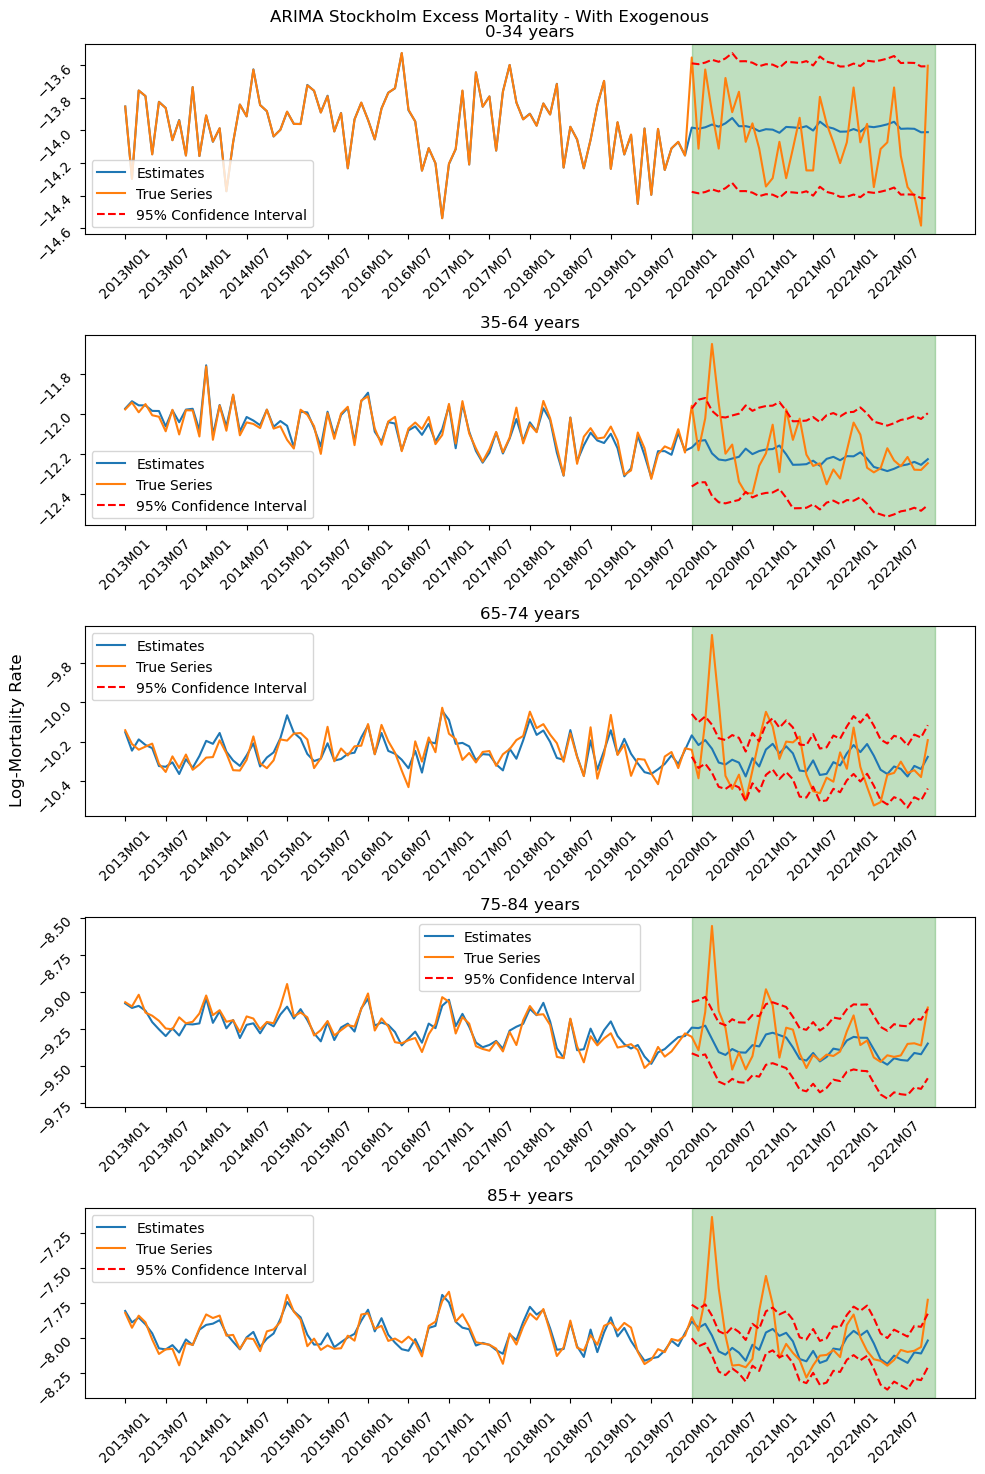

In [208]:
### With Exogenous
com_terms = 1
reg_terms = 3
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarw,K_t_preds,k_t_preds,regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D_country,D = full_model(all_swe_logmort_incCOVID,stock_logmort_incCOVID, common_terms = com_terms,regional_terms = reg_terms,prediction_period = 36,train_period = 84,exogenous_train = exog_train_stock_COVID,exogenous_test = exog_test_stock_COVID,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False)  


regional_predictions_sarwithCOVID = pd.DataFrame(regional_predictions_sarwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwithCOVID.index = stock_logmort_incCOVID.index
regional_predictions_sarwithCOVID.columns = stock_logmort_incCOVID.columns
regional_predictions_upconf.index = stock_logmort_incCOVID.index
regional_predictions_upconf.columns = stock_logmort_incCOVID.columns
regional_predictions_lowconf.index = stock_logmort_incCOVID.index
regional_predictions_lowconf.columns = stock_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwithCOVID.iloc[:,:84],stock_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])))

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@np.diag(D_country)[:com_terms,:com_terms]@K_t_preds[:,84:] + b_xs@np.diag(D)[:reg_terms,:reg_terms]@k_t_preds[:,84:]),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


error_SARIMAX_withCOVID = MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],stock_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,stock_logmort_incCOVID,suptitle = "ARIMA Stockholm Excess Mortality - With Exogenous")



In [209]:
stock_ARIMA_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_ARIMA_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_ARIMA_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_ARIMA_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)


In [181]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarw["model_0"].get_params()["order"]) + str(k_t_models_sarw["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_1"].get_params()["order"]) + str(k_t_models_sarw["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_2"].get_params()["order"]) + str(k_t_models_sarw["model_2"].get_params()["seasonal_order"]))



(1, 1, 1)(2, 0, 1, 12)
-
(0, 0, 0)(0, 0, 0, 12)
(0, 1, 1)(0, 0, 1, 12)
(0, 0, 0)(0, 0, 0, 12)


test_errors[1.69136427 1.39583732 1.89268318 4.57361888 4.54275222]
[[1.84011753 0.         0.        ]
 [0.         1.56137513 0.        ]
 [0.         0.         0.79269358]]
[[1.38909909 0.        ]
 [0.         1.02857493]]

Predicted number of deaths for COVID period [  747.  4653.  6420.  9762. 13840.]
Actual number of deaths for COVID period [  955  5492  7908 15301 20565]
Actual deaths over predicted deaths [1.27844712 1.18031378 1.2317757  1.56740422 1.4859104 ]
Total Excess Mortality (Actual - Predicted): -14799.0
Excess Mortality Ratio (Actual/Predicted): 0.7053224746619939


<Figure size 640x480 with 0 Axes>

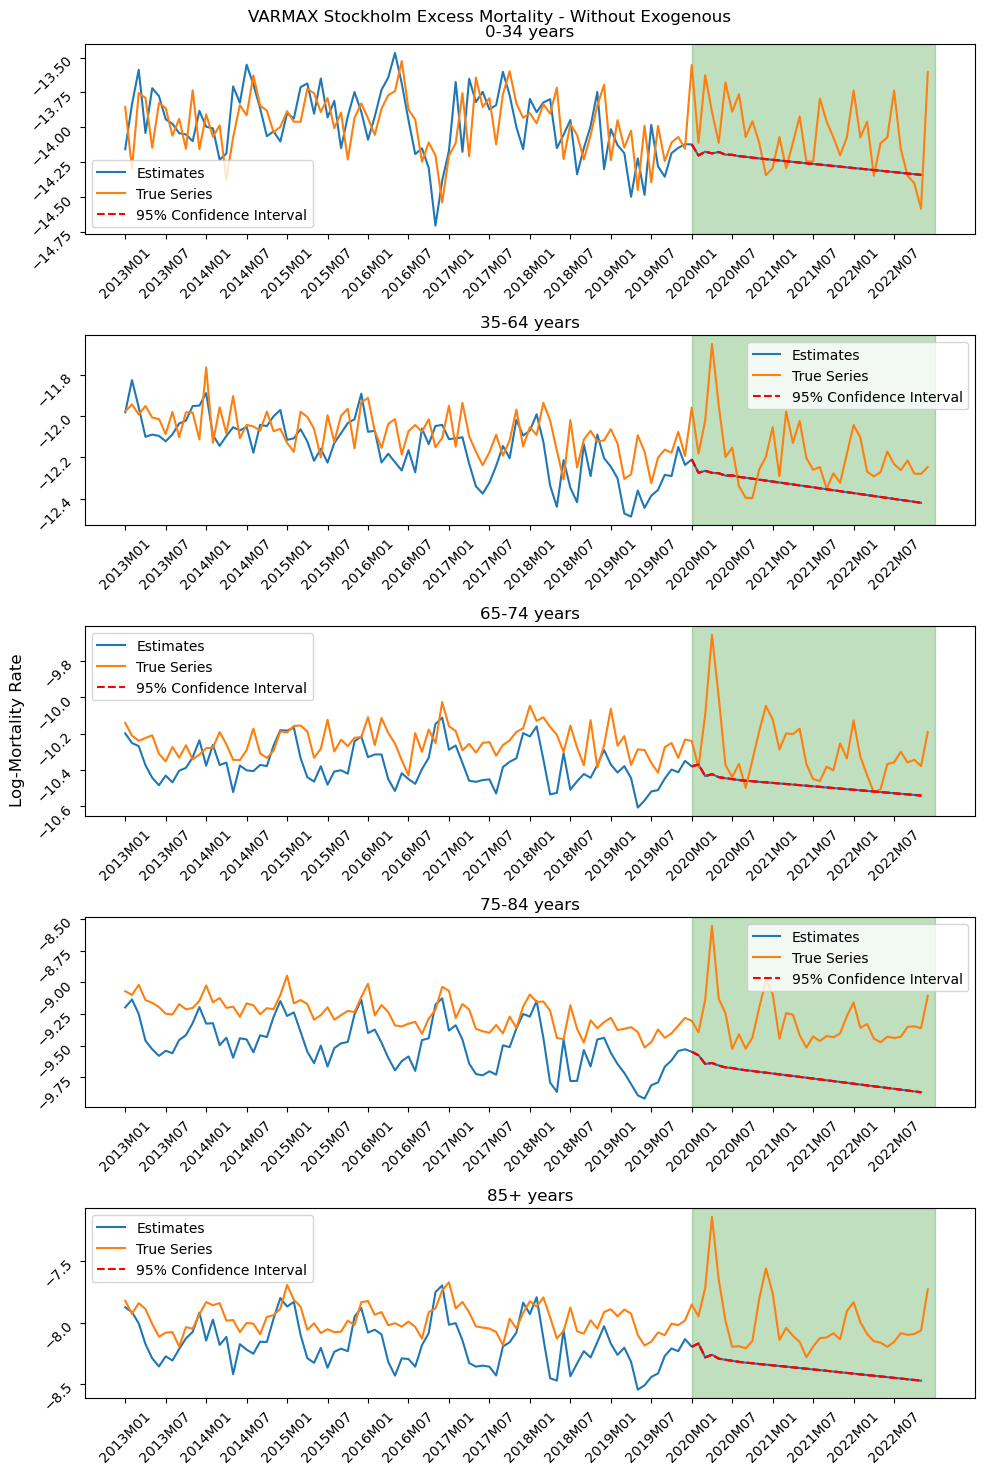

In [210]:
com_terms = 2
reg_terms = 3
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_woutCOVID,predictions_lowconf,predictions_upconf,model_VAR_woutCOVID,aic,error_VAR_woutCOVID,D_country,D = VARMAX_model(all_swe_logmort_incCOVID,stock_logmort_incCOVID, common_terms = com_terms,regional_terms = reg_terms,prediction_period = 36,train_period = 84,AR= 2,MA = 4, country_deaths = swe_death_COVID,country_pop = swe_pop_COVID,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False)


print("test_errors" + str(error_VAR_woutCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:com_terms].fillna(method="ffill")).transpose()
k_t_preds = np.array(all_k_preds.iloc[84:,com_terms:].fillna(method="ffill")).transpose()

print(np.diag(D)[:reg_terms,:reg_terms])
print(np.diag(D_country)[:com_terms,:com_terms])

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@np.diag(D_country)[:com_terms,:com_terms]@K_t_preds + b_xs@np.diag(D)[:reg_terms,:reg_terms]@k_t_preds),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


prediction_plots(predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,36,stock_logmort_incCOVID,suptitle = "VARMAX Stockholm Excess Mortality - Without Exogenous")



In [180]:
stock_VARMAX_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_VARMAX_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_VARMAX_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_VARMAX_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)



test_errors[3.56763757 1.50558467 2.76882241 6.57996062 7.5060403 ]

Predicted number of deaths for COVID period [ 1549.  4536.  5872.  8200. 11054.]
Actual number of deaths for COVID period [  955  5492  7908 15301 20565]
Actual deaths over predicted deaths [0.61652679 1.21075838 1.34673025 1.86597561 1.86041252]
Total Excess Mortality (Actual - Predicted): -19010.0
Excess Mortality Ratio (Actual/Predicted): 0.6214730889468549


<Figure size 640x480 with 0 Axes>

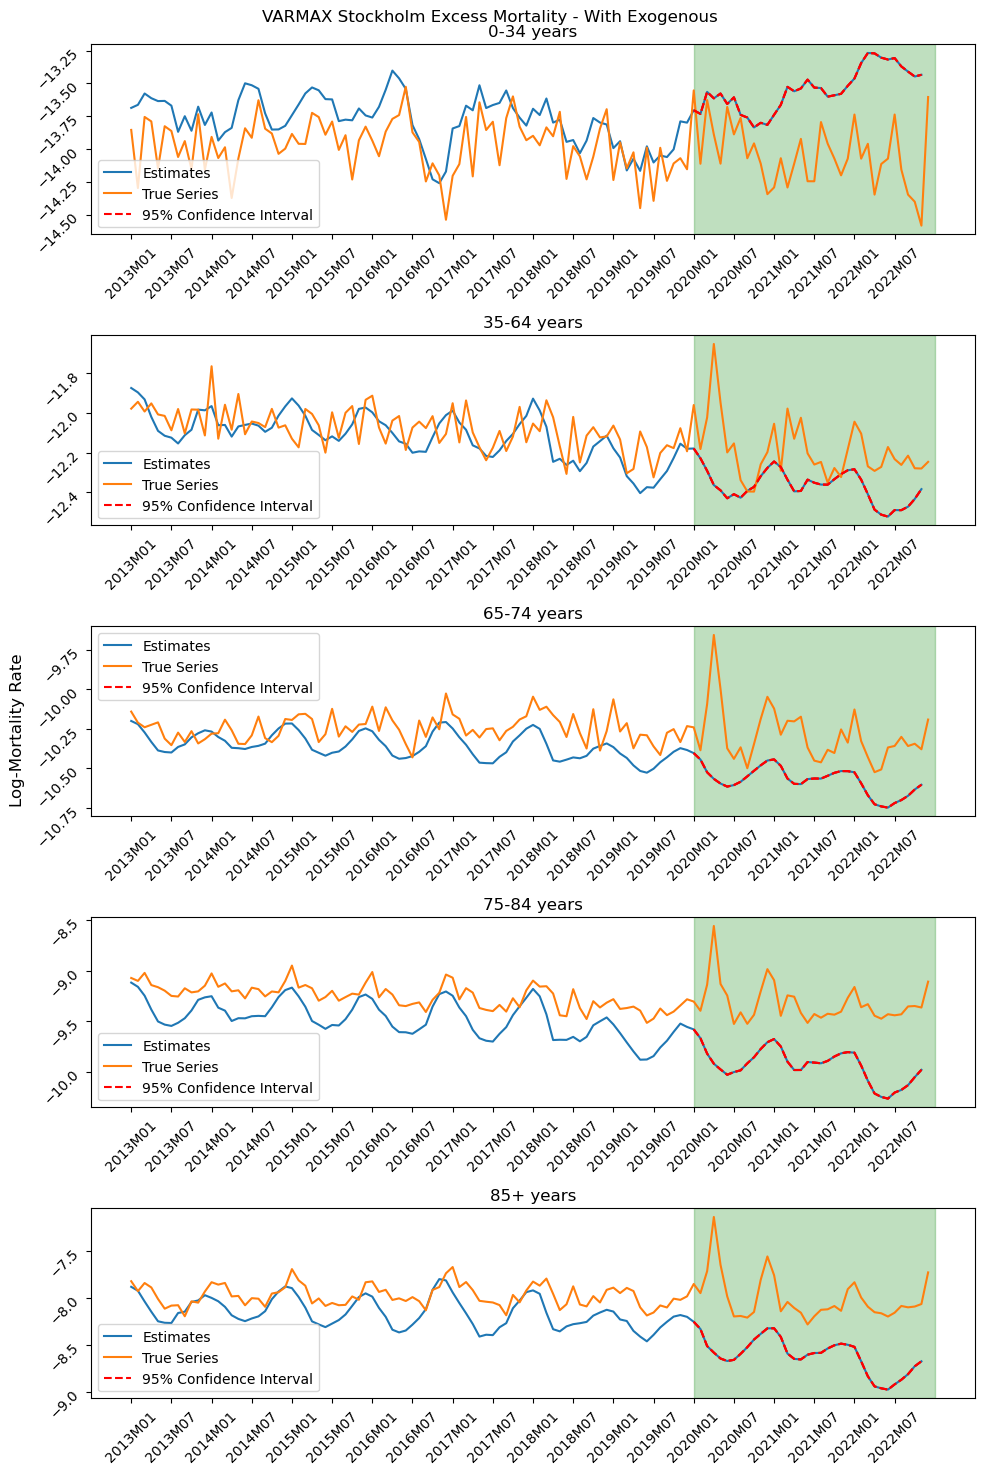

In [211]:
#exog_train_stock_COVID = lag_exogenous(exog_train_stock_COVID,numlags = 4)
#exog_test_stock_COVID = lag_exogenous(exog_test_stock_COVID,numlags = 4)

com_terms = 2
reg_terms = 2
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_withCOVID,predictions_lowconf,predictions_upconf,model_VAR_withCOVID,aic,error_VAR_withCOVID,D_country,D = VARMAX_model(all_swe_logmort_incCOVID,stock_logmort_incCOVID, common_terms = com_terms,regional_terms = reg_terms,prediction_period = 36,train_period = 84,AR= 2,MA = 5,exogenous_train = exog_train_stock_COVID,exogenous_test = exog_test_stock_COVID,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = stock_death_COVID,region_pop = stock_pop_COVID,re_est = False,smooth = True)


print("test_errors" + str(error_VAR_withCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:com_terms].fillna(method="ffill")).transpose()
k_t_preds = np.array(all_k_preds.iloc[84:,com_terms:].fillna(method = "ffill")).transpose()

#stock_pop_inCOVID = undo_person_days(pd.DataFrame(stock_pop_inCOVID,columns = stock_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@np.diag(D_country)[:com_terms,:com_terms]@K_t_preds + b_xs@np.diag(D)[:reg_terms,:reg_terms]@k_t_preds),stock_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(stock_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))

prediction_plots(predictions_VAR_withCOVID,predictions_VAR_withCOVID,predictions_VAR_withCOVID,36,stock_logmort_incCOVID,suptitle = "VARMAX Stockholm Excess Mortality - With Exogenous")


In [212]:
stock_VARMAX_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
stock_VARMAX_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
stock_VARMAX_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
stock_VARMAX_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)


In [ ]:
model_VAR_withCOVID.bic

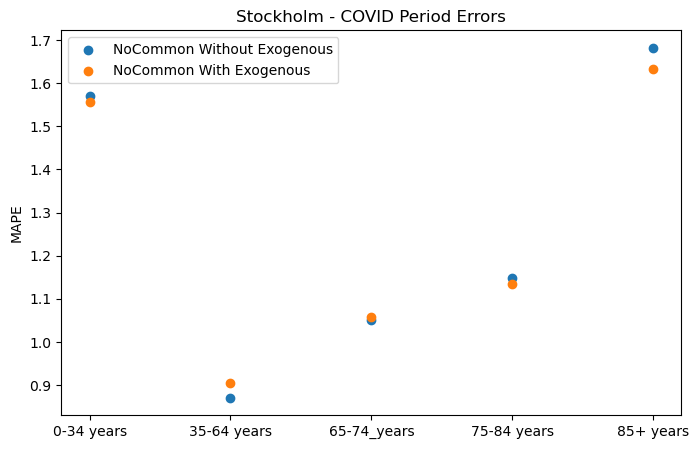

In [258]:
test_errors = np.vstack((error_SARIMAX_woutCOVID,error_SARIMAX_withCOVID,error_VAR_woutCOVID,error_VAR_withCOVID,error_NoCom_woutCOVID,error_NoCom_withCOVID))
stockholm = test_errors

age_groups = ["0-34 years","35-64 years","65-74_years","75-84 years","85+ years"]
plt.figure(figsize = (8,5))
# plt.scatter(age_groups,stockholm[0,:],label = "SARIMAX Without Exogenous")
# plt.scatter(age_groups,stockholm[1,:],label = "SARIMAX With Exogenous")
# plt.scatter(age_groups,stockholm[2,:],label = "VARMAX Without Exogenous")
# plt.scatter(age_groups,stockholm[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,stockholm[4,:],label = "NoCommon Without Exogenous")
plt.scatter(age_groups,stockholm[5,:],label = "NoCommon With Exogenous")
plt.legend()
plt.ylabel("MAPE")
plt.title("Stockholm - COVID Period Errors");

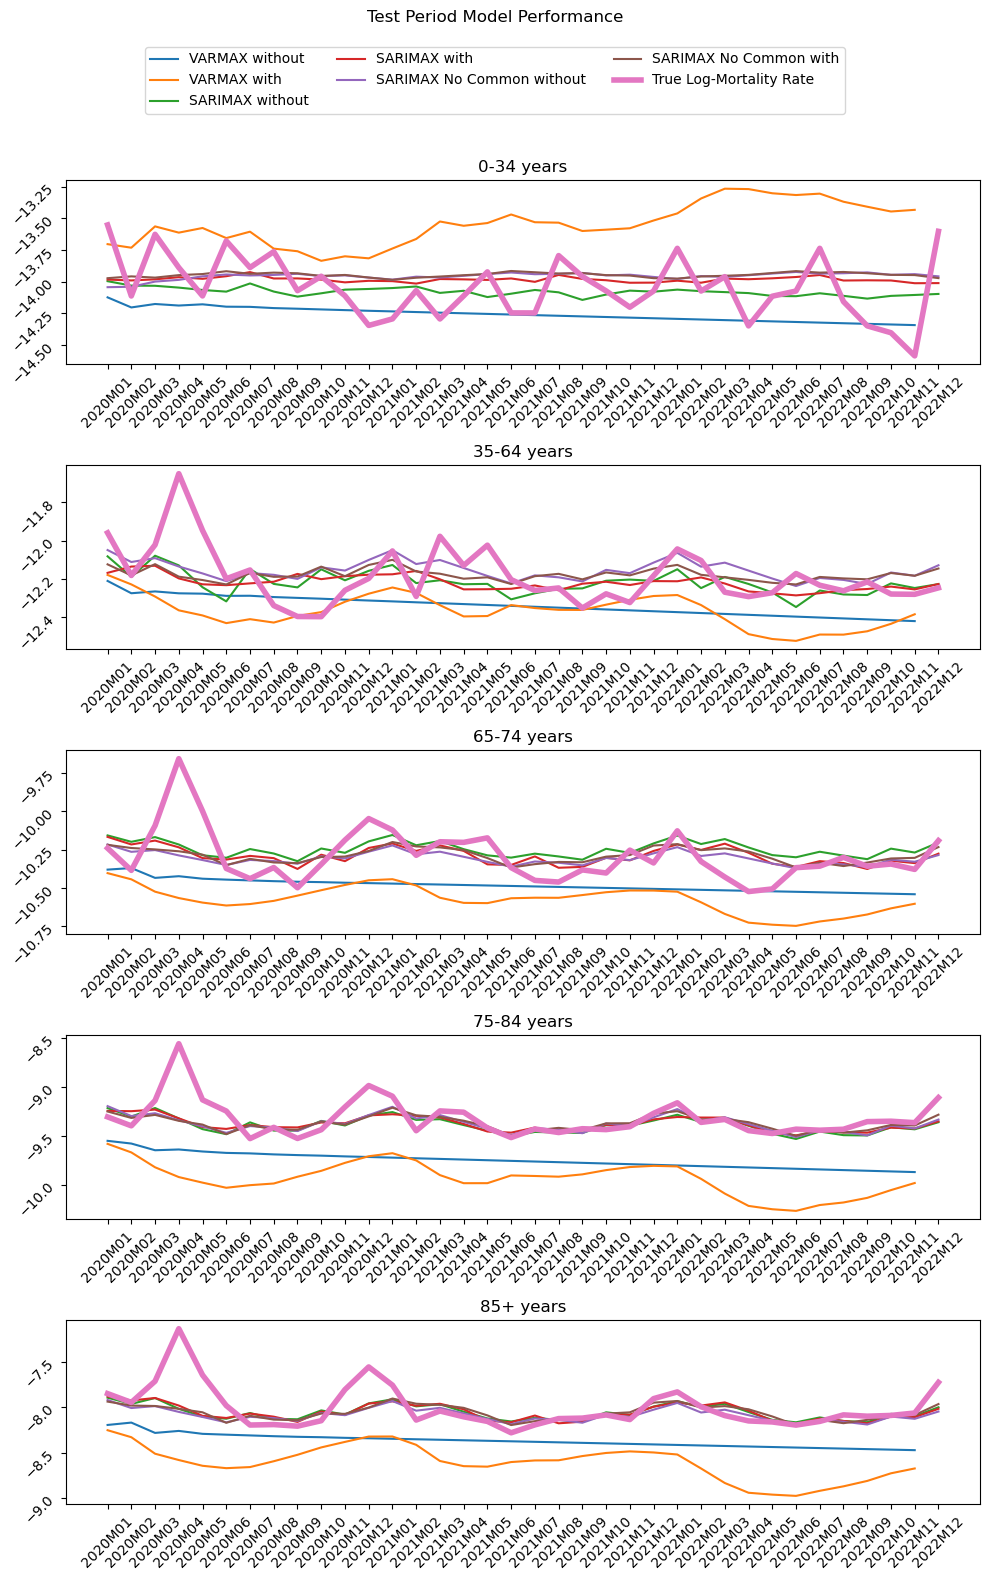

In [214]:
predictions_VAR_withCOVID = pd.DataFrame(predictions_VAR_withCOVID)
predictions_VAR_withCOVID.index = stock_logmort_incCOVID.index
predictions_VAR_withCOVID.columns = stock_logmort_incCOVID.columns

predictions_VAR_woutCOVID = pd.DataFrame(predictions_VAR_woutCOVID)
predictions_VAR_woutCOVID.index = stock_logmort_incCOVID.index
predictions_VAR_woutCOVID.columns = stock_logmort_incCOVID.columns


age_groups = ["0-34 years", "35-64 years", "65-74 years", "75-84 years", "85+ years"]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(5):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_VAR_woutCOVID.iloc[row, 84:], label="VARMAX without")
    line2, = axes[row].plot(predictions_VAR_withCOVID.iloc[row, 84:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_saroutCOVID.iloc[row, 84:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwithCOVID.iloc[row, 84:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommoutCOVID.iloc[row, 84:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwithCOVID.iloc[row, 84:], label="SARIMAX No Common with")
    line7, = axes[row].plot(stock_logmort_incCOVID.iloc[row, 84:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

2013M01    2013M02    2013M03    2013M04    2013M05    2013M06  \
Age                                                                             
0-34 years  -10.420123 -10.863356 -10.321138 -10.355323 -10.713392 -10.392010   
35-64 years  -8.544027  -8.509231  -8.558568  -8.517398  -8.573255  -8.580655   
65-74 years  -6.707183  -6.777249  -6.806156  -6.790531  -6.775216  -6.877980   
75-84 years  -5.637079  -5.665904  -5.586744  -5.707212  -5.728351  -5.762569   
85+ years    -4.388704  -4.494158  -4.407819  -4.455191  -4.577670  -4.681030   

               2013M07    2013M08    2013M09    2013M10  ...    2022M03  \
Age                                                      ...              
0-34 years  -10.428491 -10.626589 -10.505373 -10.720331  ... -10.525976   
35-64 years  -8.653476  -8.545871  -8.669336  -8.548123  ...  -8.835794   
65-74 years  -6.919419  -6.840053  -6.899149  -6.830736  ...  -6.995056   
75-84 years  -5.814502  -5.820531  -5.738987  -5.779608  ...  -5.896105   
85+ years    -4.648199  -4.644252  -4.761877  -4.602972  ...  -4.659718   

               2022M04    2022M05    2022M06    2022M07    2022M08    2022M09  \
Age                                                                             
0-34 years  -10.913726 -10.680096 -10.639258 -10.302771 -10.722609 -10.913649   
35-64 years  -8.858842  -8.838565  -8.738165  -8.799364  -8.828522  -8.781779   
65-74 years  -7.090100  -7.072974  -6.933978  -6.924294  -6.866851  -6.924825   
75-84 years  -6.010468  -6.039986  -5.995715  -6.006410  -5.996538  -5.918666   
85+ years    -4.718613  -4.729938  -4.764505  -4.723778  -4.652153  -4.666639   

               2022M10    2022M11    2022M12  
Age                                           
0-34 years  -10.967701 -11.150007 -10.169162  
35-64 years  -8.845458  -8.846831  -8.813111  
65-74 years  -6.910348  -6.945357  -6.757426  
75-84 years  -5.914579  -5.929268  -5.673295  
85+ years    -4.658258  -4.631443  -4.294853  

[5 rows x 120 columns]

0    0.020365
1    0.116727
2    0.175959
3    0.258040
4    0.428908
dtype: float64

In [228]:
### Compile predictions for excess mortality for epidemic years
lin_ests_20 = np.round(est_half2_epiyear(stock_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

#Use 2019/20 epi-year in estimate for epi-year 2020/21?  
lin_ests_20_21 = np.reshape(epi_year_lin_ests(pd.DataFrame(stock_death_full.iloc[:,:96])),(5,))
lin_ests_21_22 = np.reshape(epi_year_lin_ests(pd.DataFrame(stock_death_full.iloc[:,:108])),(5,))

#estimate for last 6 months of 2022 ie. first half epi-year 19/20
lin_ests_22 = np.round(est_half1_epiyear(stock_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

# only first half of 2020, second half of epi-year 19/20
stock_actual_deaths_20 = stock_death_full.iloc[:,84:90].sum(axis = 1) 
stock_actual_deaths_20_21 = epi_year(stock_death_full.iloc[:,84:])["year_0"].sum(axis = 1)
stock_actual_deaths_21_22 = epi_year(stock_death_full.iloc[:,84:])["year_1"].sum(axis = 1)
stock_actual_deaths_22 = epi_year(stock_death_full.iloc[:,84:])["year_2"].sum(axis = 1) #only second half of 2022 




Note: year 7 is only half an epiyear!  + First 6 months disregarded
Note: year 8 is only half an epiyear!  + First 6 months disregarded


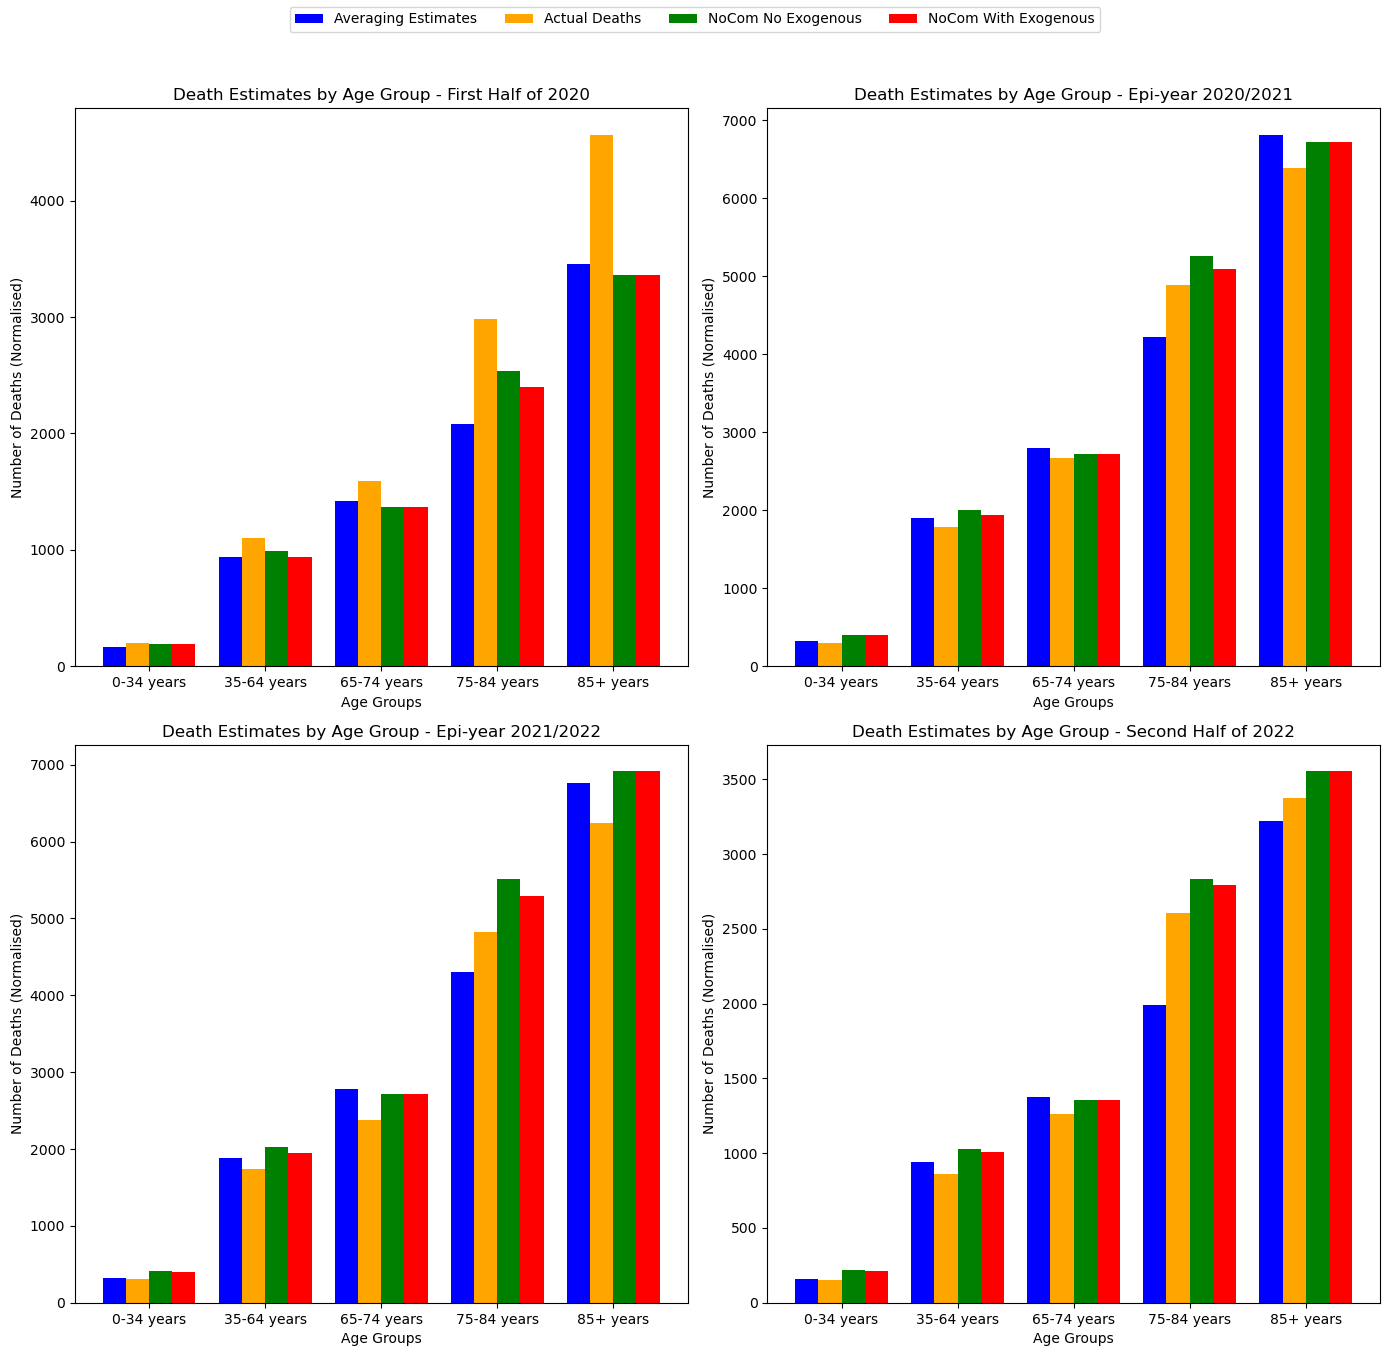

In [229]:

age_groups = stock_logmort_full.index
r = np.arange(len(age_groups))
width = 0.2  # Adjusting width to fit four bars

fig, axes = plt.subplots(2, 2, figsize=(14, 14))  # Creating a 2x2 grid of subplots

# Labels for the legends
labels = ["Averaging Estimates", "Actual Deaths", "NoCom No Exogenous", "NoCom With Exogenous"]

# Defining data sets for each subplot
data_sets = [
    (lin_ests_20, stock_actual_deaths_20, stock_NoCom_NoExog_deaths_20, stock_NoCom_WithExog_deaths_20),
    (lin_ests_20_21, stock_actual_deaths_20_21, stock_NoCom_NoExog_deaths_20_21, stock_NoCom_WithExog_deaths_20_21),
    (lin_ests_21_22, stock_actual_deaths_21_22, stock_NoCom_NoExog_deaths_21_22, stock_NoCom_WithExog_deaths_21_22),
    (lin_ests_22, stock_actual_deaths_22, stock_NoCom_NoExog_deaths_22, stock_NoCom_WithExog_deaths_22)
]
#data_sets = data_sets/np.sum(data_sets,axis = 0)
titles = [
    'Death Estimates by Age Group - First Half of 2020',
    'Death Estimates by Age Group - Epi-year 2020/2021',
    'Death Estimates by Age Group - Epi-year 2021/2022',
    'Death Estimates by Age Group - Second Half of 2022'
]

for ax, data, title in zip(axes.flatten(), data_sets, titles):
    lin_est, actual_death, NoCom_noexog, NoCom_withexog = data
    ax.bar(r - 1.5*width, lin_est, width=width, align="center", color="blue", label=labels[0])
    ax.bar(r - 0.5*width, actual_death, width=width, align="center", color="orange", label=labels[1])
    ax.bar(r + 0.5*width, NoCom_noexog, width=width, align="center", color="green", label=labels[2])
    ax.bar(r + 1.5*width, NoCom_withexog, width=width, align="center", color="red", label=labels[3])
    ax.set_xticks(r)
    ax.set_xticklabels(age_groups)
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Number of Deaths (Normalised)')
    ax.set_title(title)

# Adding a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the legend
plt.show()



In [78]:
data_sets/np.sum(data_sets,axis = 0)

array([[[0.16839635, 0.16599185, 0.16911722, 0.165072  , 0.17062764],
        [0.2052356 , 0.20029133, 0.20144158, 0.19515064, 0.22193046],
        [0.16023739, 0.16865751, 0.17161458, 0.16484517, 0.17109256],
        [0.16160627, 0.1654033 , 0.16790621, 0.15863108, 0.16465738]],

       [[0.33488577, 0.33506136, 0.33446644, 0.33519398, 0.33652699],
        [0.31308901, 0.32520029, 0.33813859, 0.31932553, 0.31038172],
        [0.33333333, 0.33339276, 0.33528646, 0.32997058, 0.33015391],
        [0.33300686, 0.33683188, 0.33354343, 0.33024824, 0.32816659]],

       [[0.33140196, 0.33260176, 0.33255046, 0.34181144, 0.33387615],
        [0.32460733, 0.3175528 , 0.30108751, 0.31540422, 0.30352541],
        [0.33630069, 0.33321448, 0.33059896, 0.33795712, 0.3332972 ],
        [0.33692458, 0.33119534, 0.33354343, 0.33971875, 0.33750848]],

       [[0.16531593, 0.16634503, 0.16386588, 0.15792258, 0.15896923],
        [0.15706806, 0.15695557, 0.15933232, 0.1701196 , 0.16416241],
        [0.170

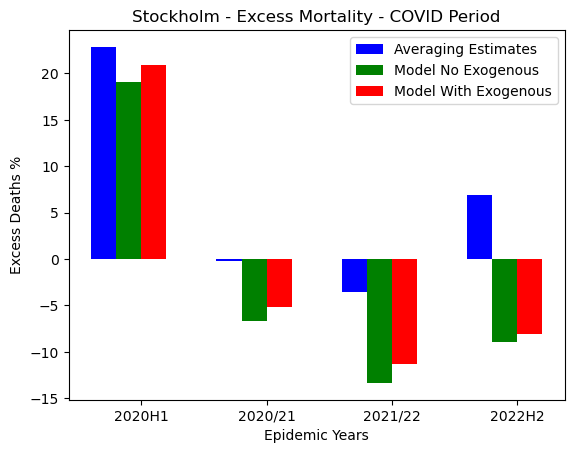

In [260]:


stock_actual_deaths_total_20 = np.sum(stock_actual_deaths_20)
lin_ests_excess_20 = (stock_actual_deaths_total_20 - np.sum(lin_ests_20))/stock_actual_deaths_total_20 *100
stock_NoCom_NoExog_excess_total_20 = (stock_actual_deaths_total_20 - np.sum(stock_NoCom_NoExog_deaths_20))/stock_actual_deaths_total_20 *100
stock_NoCom_WithExog_excess_total_20 = (stock_actual_deaths_total_20 - np.sum(stock_NoCom_WithExog_deaths_20))/stock_actual_deaths_total_20 *100

stock_actual_deaths_total_20_21 = np.sum(stock_actual_deaths_20_21)
lin_ests_excess_20_21 = (stock_actual_deaths_total_20_21 - np.sum(lin_ests_20_21))/stock_actual_deaths_total_20_21 *100
stock_NoCom_NoExog_excess_total_20_21 = (stock_actual_deaths_total_20_21 - np.sum(stock_NoCom_NoExog_deaths_20_21))/stock_actual_deaths_total_20_21 *100
stock_NoCom_WithExog_excess_total_20_21 = (stock_actual_deaths_total_20_21 - np.sum(stock_NoCom_WithExog_deaths_20_21))/stock_actual_deaths_total_20_21 *100

stock_actual_deaths_total_21_22 = np.sum(stock_actual_deaths_21_22)
lin_ests_excess_21_22 = (stock_actual_deaths_total_21_22 - np.sum(lin_ests_21_22))/stock_actual_deaths_total_21_22 *100
stock_NoCom_NoExog_excess_total_21_22 = (stock_actual_deaths_total_21_22 - np.sum(stock_NoCom_NoExog_deaths_21_22))/stock_actual_deaths_total_21_22 *100
stock_NoCom_WithExog_excess_total_21_22 = (stock_actual_deaths_total_21_22 - np.sum(stock_NoCom_WithExog_deaths_21_22))/stock_actual_deaths_total_21_22 *100

stock_actual_deaths_total_22 = np.sum(stock_actual_deaths_22)
lin_ests_excess_22 = (stock_actual_deaths_total_22 - np.sum(lin_ests_22))/stock_actual_deaths_total_22 *100
stock_NoCom_NoExog_excess_total_22 = (stock_actual_deaths_total_22 - np.sum(stock_NoCom_NoExog_deaths_22))/stock_actual_deaths_total_22 *100
stock_NoCom_WithExog_excess_total_22 = (stock_actual_deaths_total_22 - np.sum(stock_NoCom_WithExog_deaths_22))/stock_actual_deaths_total_22 *100


# Assuming stock_logmort_full, lin_ests_20, stock_actual_deaths_20, stock_NoCom_NoExog_deaths_20, and stock_NoCom_WithExog_deaths_20 are defined
# stock_logmort_full.index should be a list or an array of age groups

years = ["2020H1", "2020/21","2021/22", "2022H2"]
r = np.arange(len(years))
width = 0.2  # Adjusting width to fit four bars

# Labels for the legends
labels = ["Averaging Estimates", "Model No Exogenous", "Model With Exogenous","_nolegend_"]

plt.bar(r[0] - 1.5*width, lin_ests_excess_20, width=0.2, align="center", color="blue", label=labels[0])
plt.bar(r[0] - 0.5*width, stock_NoCom_NoExog_excess_total_20, width=0.2, align="center", color="green", label=labels[1])
plt.bar(r[0] + 0.5*width, stock_NoCom_WithExog_excess_total_20, width=0.2, align="center", color="red", label=labels[2])
#plt.bar(r[0] + 1.5*width, stock_actual_deaths_total_20, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[1] - 1.5*width, lin_ests_excess_20_21, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[1] - 0.5*width, stock_NoCom_NoExog_excess_total_20_21, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[1] + 0.5*width, stock_NoCom_WithExog_excess_total_20_21, width=0.2, align="center", color="red", label=labels[3])
#plt.bar(r[1] + 1.5*width, stock_actual_deaths_total_20_21, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[2] - 1.5*width, lin_ests_excess_21_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[2] - 0.5*width, stock_NoCom_NoExog_excess_total_21_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[2] + 0.5*width, stock_NoCom_WithExog_excess_total_21_22, width=0.2, align="center", color="red", label=labels[3])

plt.bar(r[3] - 1.5*width, lin_ests_excess_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[3] - 0.5*width, stock_NoCom_NoExog_excess_total_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[3] + 0.5*width, stock_NoCom_WithExog_excess_total_22, width=0.2, align="center", color="red", label=labels[3])

plt.xticks(r, years)
plt.legend()
plt.xlabel('Epidemic Years')
plt.ylabel('Excess Deaths %')
plt.title('Stockholm - Excess Mortality - COVID Period');
# plt.show()



In [159]:
print(np.sum(lin_ests_20_21))
print(np.sum(stock_actual_deaths_20_21))

16057.857142857141
16028


p_value k_t0 before re-estimation: 1.878574847947686e-24 

p_value k_t1 before re-estimation: 0.08951227999404744 

Regional k_t1 is white noise with LB p_value 0.08951227999404744 

Proportion of k_t values which are positive[0.5        0.52083333] 

Proportion of b_x values which are positive[0.  0.6] 

p_value k_t0 after re-estimation: 1.7049410247257938e-20 

p_value k_t1 after re-estimation: 0.8622642607793988 

Regional k_t1 is white noise with LB p_value 0.8622642607793988 

Model Error 7.146852153617194
Re_estimation error Each Age Group (MAPE): [0.0759634  0.54205726 0.49813951 0.39699859 0.56079772]

 Prediction Error Each Age Group (MAPE)[0.05851793 0.44918018 0.53709891 0.39839924 0.43927948]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 115.240
Date:                Mon, 15 Jul 2024   AIC      

<Figure size 640x480 with 0 Axes>

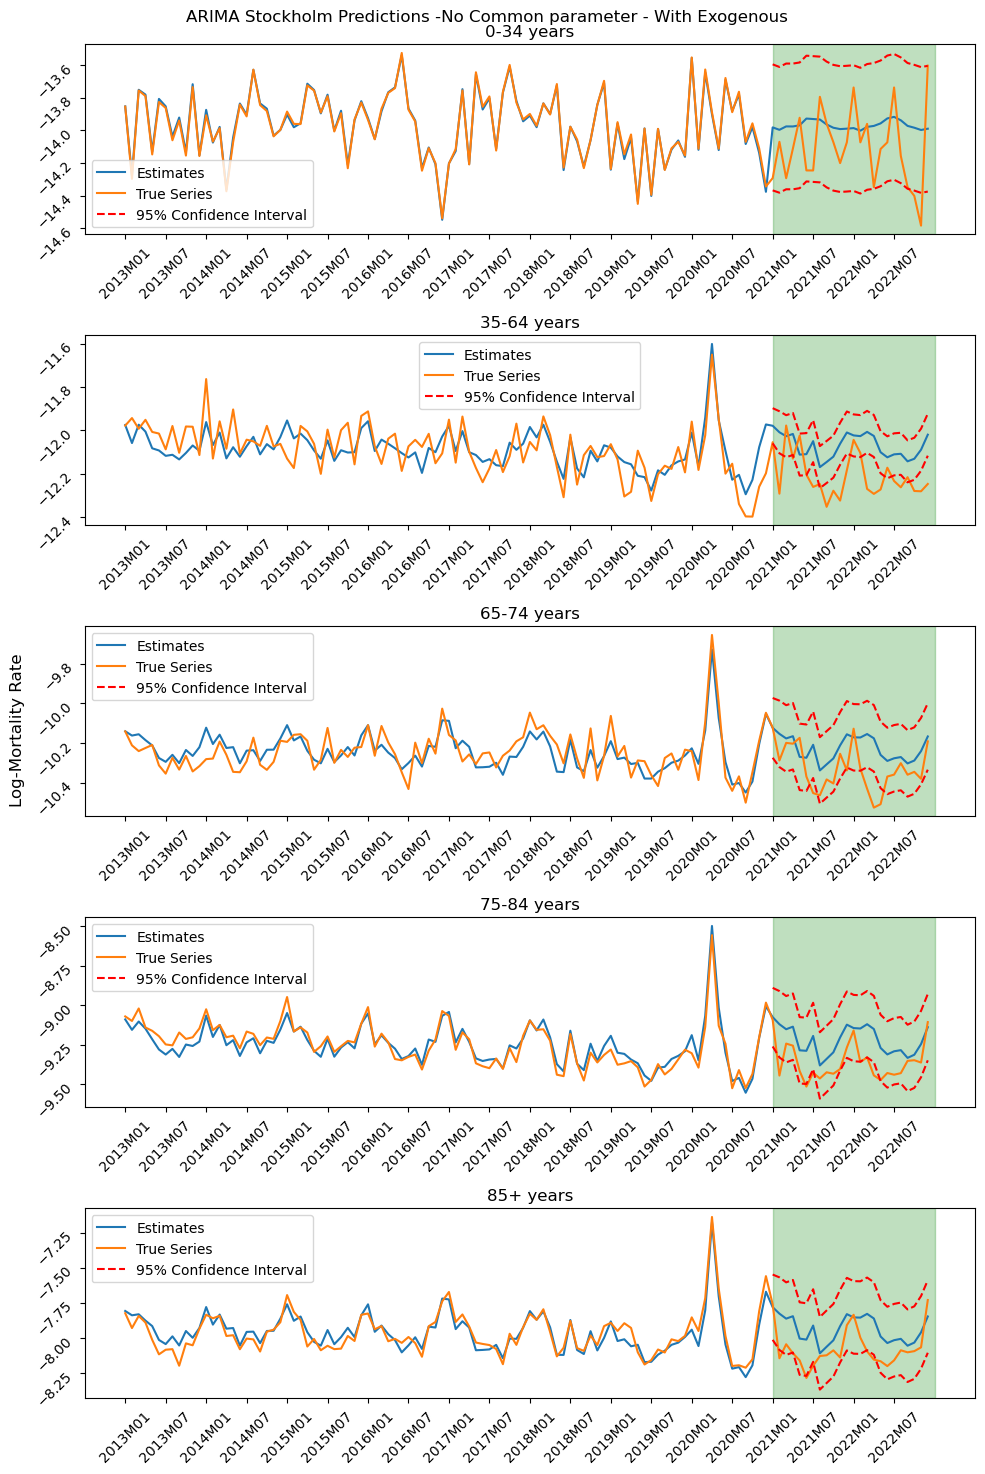

In [249]:
## Model No Common parameter - with Exogenous
extra_exog = exog_test_stock_COVID.iloc[:12,:]
extra_exog.index = range(84,96)
exog_train_extra = pd.concat([exog_train_stock_COVID,extra_exog])
exog_test_extra = exog_test_stock_COVID.iloc[12:,:]



a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(stock_logmort_incCOVID,regional_terms = 2,prediction_period = 24,train_period = 96,exogenous_train = exog_train_extra,exogenous_test = exog_test_extra,region_deaths = stock_death,region_pop = stock_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_stock,exogenous_test = exog_test_stock
regional_predictions_nocommwith = pd.DataFrame(regional_predictions_nocommwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwith.index = stock_logmort_full.index
regional_predictions_nocommwith.columns = stock_logmort_incCOVID.columns
regional_predictions_upconf.index = stock_logmort_full.index
regional_predictions_upconf.columns = stock_logmort_incCOVID.columns
regional_predictions_lowconf.index = stock_logmort_full.index
regional_predictions_lowconf.columns = stock_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwith.iloc[:,:60],stock_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_with = MAPE(regional_predictions_nocommwith.iloc[:,60:],stock_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,24,stock_logmort_incCOVID,suptitle = "ARIMA Stockholm Predictions -No Common parameter - With Exogenous ")



In [246]:
extra_exog = exog_test_stock_COVID.iloc[:12,:]
extra_exog.index = range(84,96)
exog_train_extra = pd.concat([exog_train_stock_COVID,extra_exog])
exog_test_extra = exog_test_stock_COVID.iloc[12:,:]

av_temp   av_humid  temp_below  temp_above  hols
0   -3.470968  90.390323        22.0         0.0     8
1   -1.564286  88.100000        21.0         0.0     4
2   -2.512903  65.141935        25.0         0.0     3
3    4.713333  67.450000         1.0         0.0     7
4   12.967742  69.970968         0.0         0.0     0
..        ...        ...         ...         ...   ...
91  18.954839  64.822581         0.0        12.0    19
92  13.836667  78.300000         0.0         0.0     0
93   9.283871  85.054839         0.0         0.0     6
94   6.823333  84.990000         1.0         0.0     1
95   3.941935  89.322581         2.0         0.0    14

[96 rows x 5 columns]